# Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('./data/stud_math.csv')

Посмотрим на содержание dataset и типы и пропуски в столбцах

In [2]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Посотрим на % пропусков в DF

In [4]:
100 * stud.isnull().sum() / len(stud)

school                  0.000000
sex                     0.000000
age                     0.000000
address                 4.303797
famsize                 6.835443
Pstatus                11.392405
Medu                    0.759494
Fedu                    6.075949
Mjob                    4.810127
Fjob                    9.113924
reason                  4.303797
guardian                7.848101
traveltime              7.088608
studytime               1.772152
failures                5.569620
schoolsup               2.278481
famsup                  9.873418
paid                   10.126582
activities              3.544304
nursery                 4.050633
studytime, granular     1.772152
higher                  5.063291
internet                8.607595
romantic                7.848101
famrel                  6.835443
freetime                2.784810
goout                   2.025316
health                  3.797468
absences                3.037975
score                   1.518987
dtype: flo

По каждом принаку колво пропусков менше 50%. Мах значение пропусков в Pstatus = 11%. Не буду удалять признаки, буду заполнять 
пропуски среднми значениями или буду проверять по зависимости с другими принаками.

# Начнем анализ данных в каждом столбце, есть ли пропуски, кол-во уникальных значений, обработать выбросы.


## Начну с анализа school

In [5]:
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

В столбце school нет пропусков есть только два значения может позже преобразую в dummy переменные. Всего 2-а значения. Это хорошо

In [6]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

С полом тоже все хорошо, 2-а значения как и надо.

In [7]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

В age все данные правильные пропусков нет

## В address есть пустые значения проверю на кол-во уникальных значений


In [8]:
stud.address.value_counts()

U    295
R     83
Name: address, dtype: int64

Посмотим на данные где есть пропуски, может есть какая-то закономерность

In [9]:
stud.query('address!="U" & address!="R"')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN


In [10]:
stud.groupby(['school','address','reason'])['school'].count()

school  address  reason    
GP      R        course        25
                 home           8
                 other          3
                 reputation    24
        U        course        91
                 home          81
                 other         21
                 reputation    71
MS      R        course         8
                 home           3
                 other          7
                 reputation     4
        U        course         8
                 home           4
                 other          2
                 reputation     1
Name: school, dtype: int64

In [11]:
stud.groupby(['school','address'])['school'].count()

school  address
GP      R           60
        U          277
MS      R           23
        U           18
Name: school, dtype: int64

Получается школ  с типом GP больше находится в городской местности, 
и учеников у которых причина близость от дома больше в городской местности. Проставим по умолчанию для школ с типом GP и
причиной близость от дома. address = U

In [12]:
def fill_address(row):
    if pd.isnull(row.address) and row.school=='GP' and row.reason=='home':
        return 'U'
    return row.address

stud.address = stud.apply(lambda row: fill_address(row), axis=1)


Остались еще не заполненые address посмотрим на график зависимости с причиной выбора школы

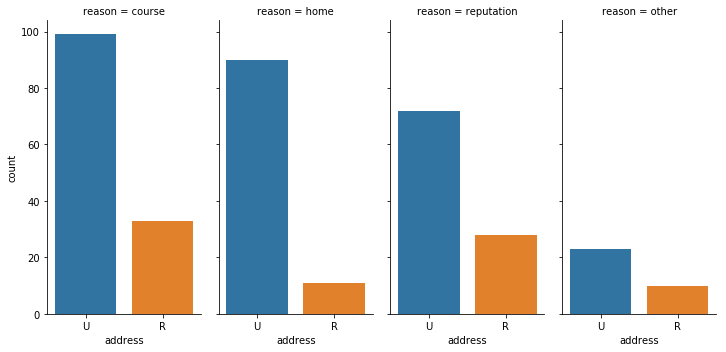

In [13]:
order = stud.reason.value_counts().index
sns.catplot(x='address', col = 'reason', col_order = order, kind ='count', data=stud, aspect = 0.5);

Зависимости от причины какой-то особенной нет везде преобладает U. Так в выборке больше значений адреса городского типа 
проставим для пустых U

In [14]:
stud.address = stud.address.fillna('U')

## Проанализируем famsize 

In [15]:
stud.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

Посмотрим на значения в которых ппустые значения

In [16]:
stud.query('famsize!="GT3" & famsize!="LE3"')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0


Попробую найти взаимосвязи famsize с другими признаками

famsize  freetime
GT3      1.0          13
         2.0          41
         3.0         107
         4.0          67
         5.0          25
LE3      1.0           5
         2.0          18
         3.0          37
         4.0          37
         5.0           9
Name: famsize, dtype: int64

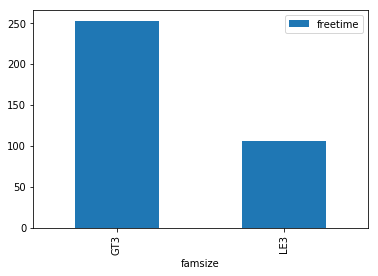

In [17]:
stud.pivot_table(values = ['freetime'], 
               index = 'famsize', 
               aggfunc = 'count').plot(kind = 'bar')
stud.groupby(['famsize','freetime'])['famsize'].count()

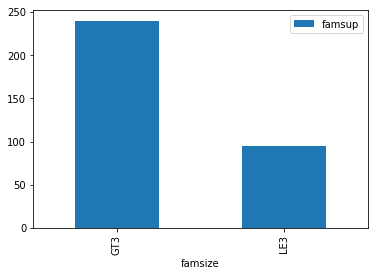

In [18]:
stud.pivot_table(values = ['famsup'], 
               index = 'famsize', 
               aggfunc = 'count').plot(kind = 'bar')

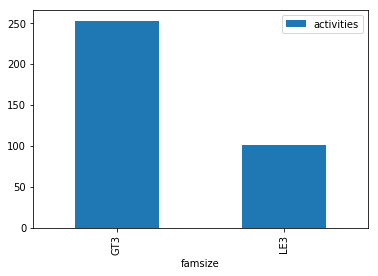

In [19]:

stud.pivot_table(values = ['activities'], 
               index = 'famsize', 
               aggfunc = 'count').plot(kind = 'bar')

In [20]:
stud.groupby(['activities','famsize'])['famsize'].count()

activities  famsize
no          GT3        123
            LE3         52
yes         GT3        130
            LE3         49
Name: famsize, dtype: int64

In [21]:
stud.groupby(['freetime','famsize'])['famsize'].count()

freetime  famsize
1.0       GT3         13
          LE3          5
2.0       GT3         41
          LE3         18
3.0       GT3        107
          LE3         37
4.0       GT3         67
          LE3         37
5.0       GT3         25
          LE3          9
Name: famsize, dtype: int64

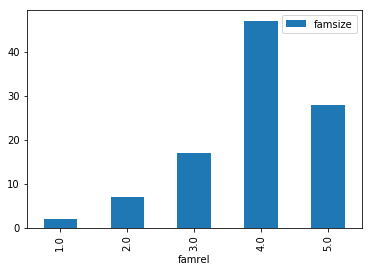

In [22]:
stud.query('famsize!="GT3"').pivot_table(values = ['famsize'], 
               index = 'famrel', 
               aggfunc = 'count').plot(kind = 'bar')

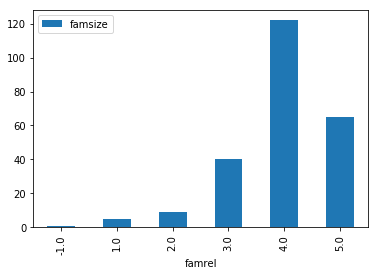

In [23]:
stud.query('famsize!="LE3"').pivot_table(values = ['famsize'], 
               index = 'famrel', 
               aggfunc = 'count').plot(kind = 'bar')

In [24]:
stud.groupby(['school','famsize'])['school'].count()

school  famsize
GP      GT3        233
        LE3         91
MS      GT3         28
        LE3         16
Name: school, dtype: int64

Каких-то особенных взаимосвязей не нашла. Будем проставлять по большому значению. Т.к GT3 в 2-а раза больше, предпологаю что в иследовании больше расматривались семье >= 3. Проставлю для пустых значений GT3

In [25]:
stud.famsize = stud.famsize.fillna('GT3')

## Проанализирую Pstatus, есть пустые значения

In [26]:
stud.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [27]:
stud.query('Pstatus!="T" & Pstatus!="A"')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,GP,M,15,U,GT3,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


In [28]:
stud.groupby(['Pstatus','guardian'])['Pstatus'].count()

Pstatus  guardian
A        father        4
         mother       27
         other         4
T        father       71
         mother      195
         other        20
Name: Pstatus, dtype: int64

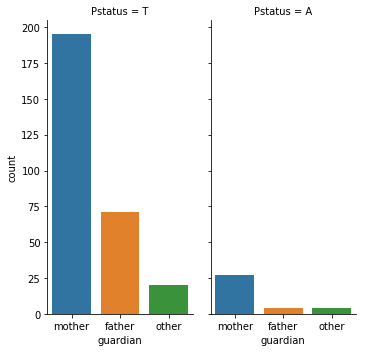

In [29]:
order = stud.Pstatus.value_counts().index
sns.catplot(x='guardian', col = 'Pstatus', col_order = order, kind ='count', data=stud, aspect = 0.5)

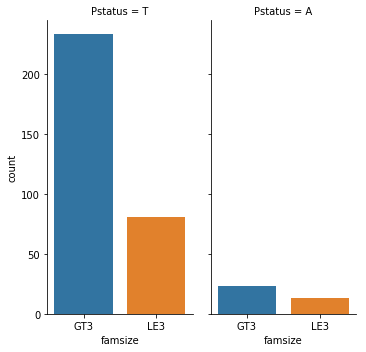

In [30]:
order = stud.Pstatus.value_counts().index
sns.catplot(x='famsize', col = 'Pstatus', col_order = order, kind ='count', data=stud, aspect = 0.5)

Взаимосвязей с другими признаками сильной нет, заполню большим по значению T

In [31]:
stud.Pstatus = stud.Pstatus.fillna('T')

## Анализирую колонку Medu
Псмотрим какого значения больше

In [32]:
stud.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Посмотрим на строки с пустыми значениями

In [33]:
stud.query('Medu not in [0,1,2,3,4]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,U,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,T,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,T,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


In [34]:
stud.Medu.median()

3.0

заполним пропуски медианой Medu

In [35]:
stud.Medu = stud.Medu.fillna(3)

## Анализируем Fedu

In [36]:
stud.Fedu.isna().value_counts()

False    371
True      24
Name: Fedu, dtype: int64

In [37]:
stud.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

значение 40 не должно быть в выборке посмотрим на строку

In [38]:
stud.query('Fedu in [40]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Наверное это ошибка будем считать что это Nan

In [39]:
stud.Fedu.median()

2.0

Посмотрим взаимосвязь образование матери и отца

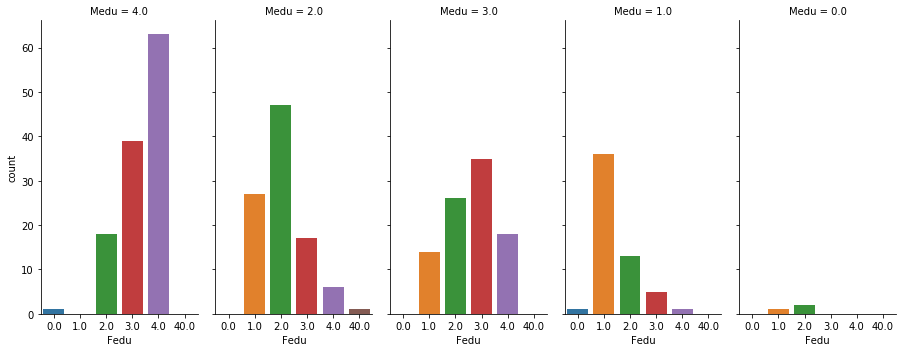

In [40]:
order = stud.Medu.value_counts().index
sns.catplot(x='Fedu', col = 'Medu', col_order = order, kind ='count', data=stud, aspect = 0.5)

Интересно а как взаимосвязаны образование отца и выбор школы

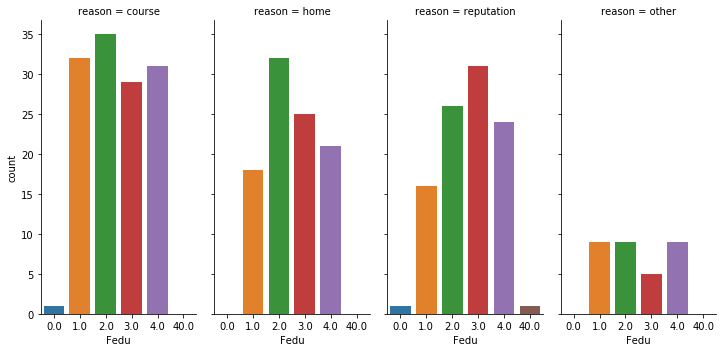

In [41]:
order = stud.reason.value_counts().index
sns.catplot(x='Fedu', col = 'reason', col_order = order, kind ='count', data=stud, aspect = 0.5);

Сильной взаимосвязи нет между выбором школы. Но по графику видно что в большой части образование отца такое же как и образование матери заполним таким же образованием как у матери, для Medu = 0 проставим Fedu медианой. 

In [42]:
def FillFedu(row):
   
    if pd.isnull(row.Fedu):
        if row.Medu==0:
            return 2
        else:
            return row.Medu
    if row.Fedu==40:
        return 2
    
    return row.Fedu

stud.Fedu = stud.apply(lambda row: FillFedu(row), axis=1)

## Mjob - проверим пропуски, уникальные значения

In [43]:
stud.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Посмотрим на строки с пропусками

In [44]:
stud.query('Mjob not in ["other","services","at_home","teacher","health"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,T,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,GT3,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,T,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


Посмотрим взаимосвязь работы отца и матери

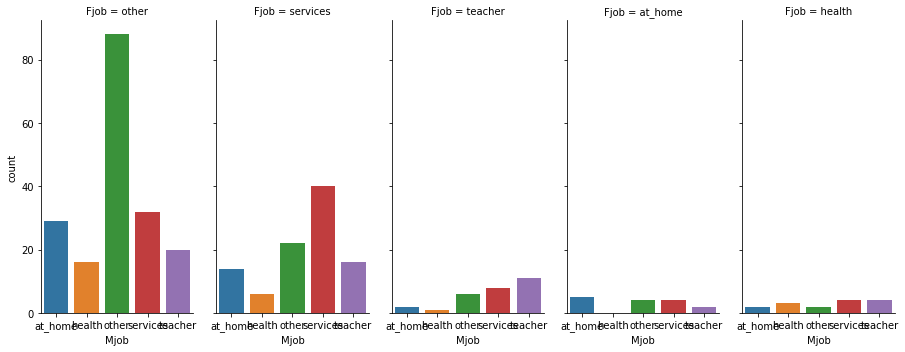

In [45]:
order = stud.Fjob.value_counts().index
sns.catplot(x='Mjob', col = 'Fjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

взаимосвязь работы отца и матери в сервисе и учителя не большая. Не могу точно сказать если отчец учитель тогда мать учитель
Простаявлю для пустых значений other. 

In [46]:
stud.Mjob = stud.Mjob.fillna('other')

## Проанализируем Fjob на пустые значения и уникальные 

In [47]:
stud.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [48]:
stud.query('Fjob not in ["other","services","at_home","teacher","health"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


не вижу взаимосвязи Fjob с другими признаками проставлю для пустых значение other


In [49]:
stud.Fjob = stud.Fjob.fillna('other')

## Проанализируем reason, уникальные значения пустые строки, взаимосвязь с другими признками

In [50]:
stud.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

нет не логичных значений все значения из списка. посмотрим на пустые строки


In [51]:
stud.query('reason not in ["course","home","reputation","other"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,-6.0,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,T,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,T,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
137,GP,F,16,U,GT3,A,3.0,3.0,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,T,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0


посмотрим взаимосязь школы и причины

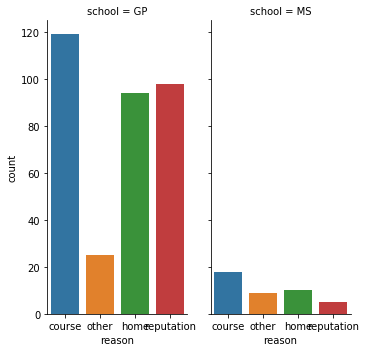

In [52]:
order = stud.school.value_counts().index
sns.catplot(x='reason', col = 'school', col_order = order, kind ='count', data=stud, aspect = 0.5);

взаимосвязь времени в пути и причины

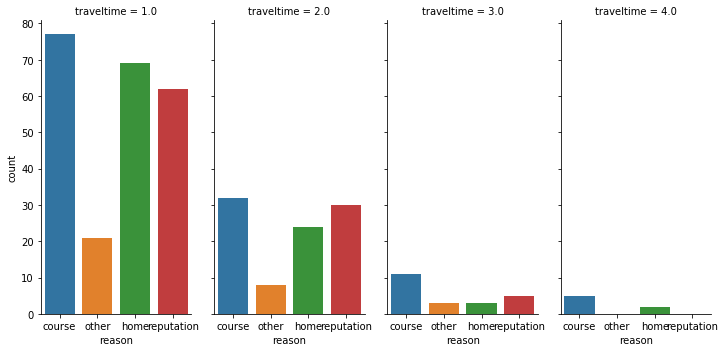

In [53]:
order = stud.traveltime.value_counts().index
sns.catplot(x='reason', col = 'traveltime', col_order = order, kind ='count', data=stud, aspect = 0.5);

посмотрим состояние здоровья и причины


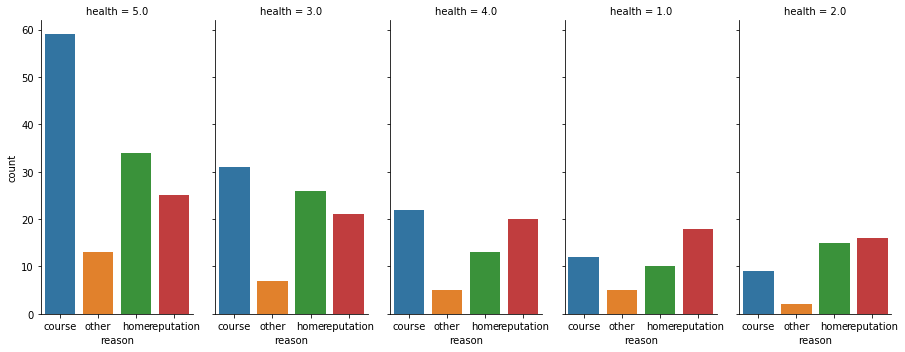

In [54]:
order = stud.health.value_counts().index
sns.catplot(x='reason', col = 'health', col_order = order, kind ='count', data=stud, aspect = 0.5);

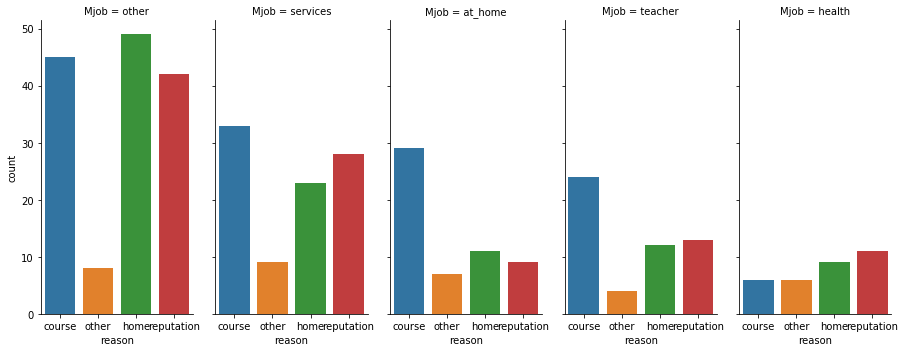

In [55]:
order = stud.Mjob.value_counts().index
sns.catplot(x='reason', col = 'Mjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

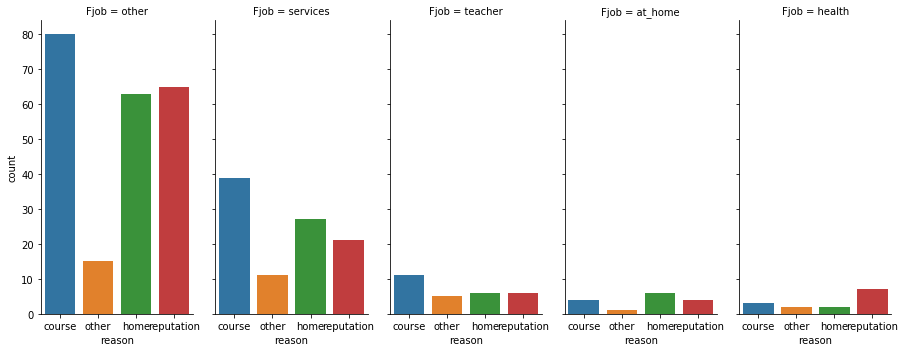

In [56]:
order = stud.Fjob.value_counts().index
sns.catplot(x='reason', col = 'Fjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

По анализу получается что если мама сидит дома или в здравоохранении, то предпочитают образоватьную программу. 
По времени в пути, большой взаимосвязи нет. Но если 1-и мама работает в other, то скорее всего это близость к дому. 
Для остальных значений проставлю образоватьную программу, т.к. его больше 


In [57]:
def fill_reason(row):
   
    if pd.isnull(row.reason):
        if row.Mjob == 'other' and row.traveltime == 1:
            return 'home'
        return 'course'
    
    return row.reason

stud.reason = stud.apply(lambda row: fill_reason(row), axis=1)

## Анализирую guardian на пропуски, уникальность значений

In [58]:
stud.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [59]:
stud.query('guardian not in ["mother","father","other"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,T,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,course,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


посмотрим взаимосвязь опекунства и Pstatus, famsup, Mjob, Fjob

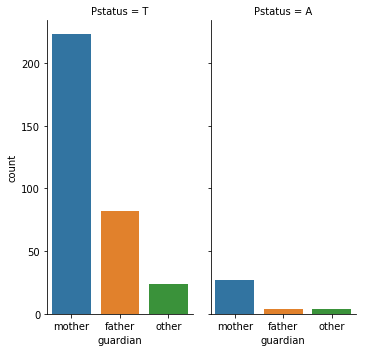

In [60]:
order = stud.Pstatus.value_counts().index
sns.catplot(x='guardian', col = 'Pstatus', col_order = order, kind ='count', data=stud, aspect = 0.5);

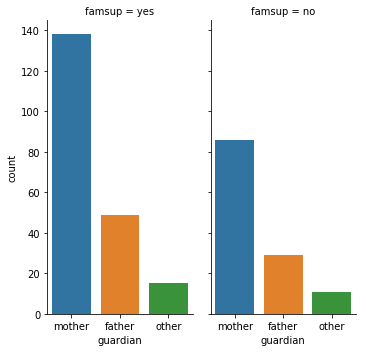

In [61]:
order = stud.famsup.value_counts().index
sns.catplot(x='guardian', col = 'famsup', col_order = order, kind ='count', data=stud, aspect = 0.5);

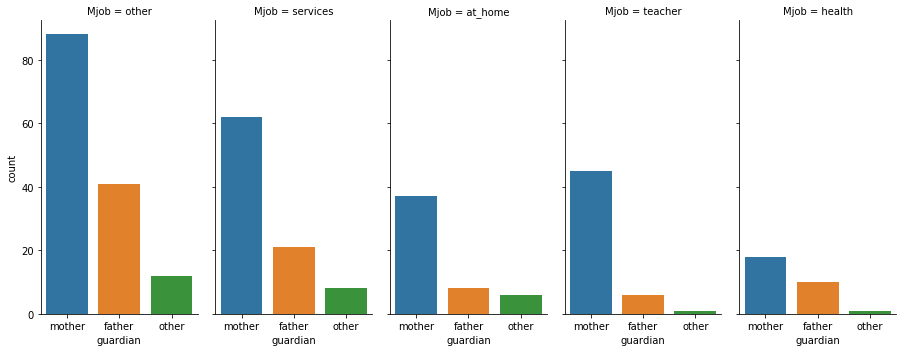

In [62]:
order = stud.Mjob.value_counts().index
sns.catplot(x='guardian', col = 'Mjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

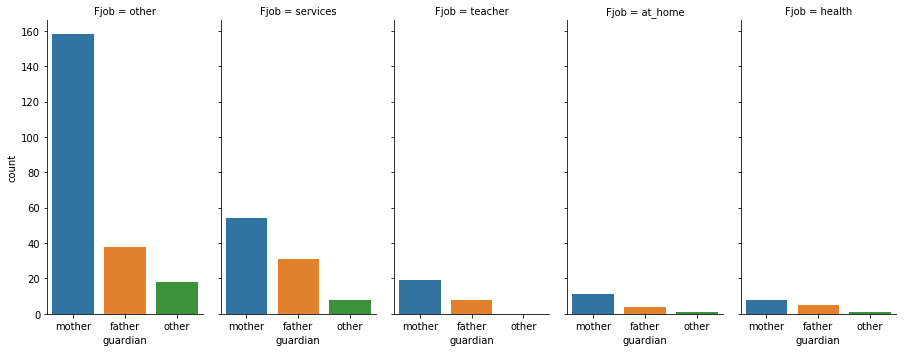

In [63]:
order = stud.Fjob.value_counts().index
sns.catplot(x='guardian', col = 'Fjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

проставлю по умолчанию mother, т.к данного опекуна больше

In [64]:
stud.guardian = stud.guardian.fillna('mother')

## Анализируем столбец traveltime, пустые значения, выбросы, взаимосвязь с другими признаками

In [65]:
stud.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

посмотрим на взаимосвязь времени в пути и причины


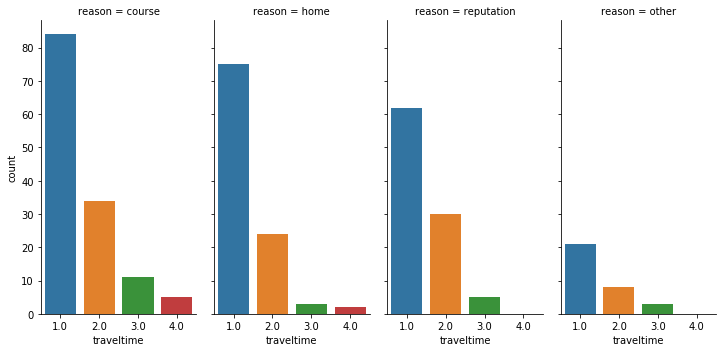

In [66]:
order = stud.reason.value_counts().index
sns.catplot(x='traveltime', col = 'reason', col_order = order, kind ='count', data=stud, aspect = 0.5);

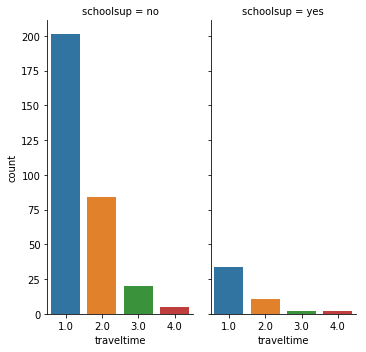

In [67]:

order = stud.schoolsup.value_counts().index
sns.catplot(x='traveltime', col = 'schoolsup', col_order = order, kind ='count', data=stud, aspect = 0.5);

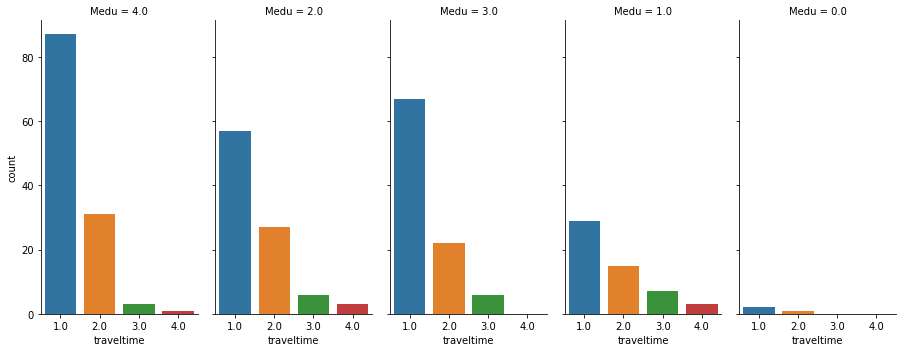

In [68]:

order = stud.Medu.value_counts().index
sns.catplot(x='traveltime', col = 'Medu', col_order = order, kind ='count', data=stud, aspect = 0.5);

Нет такой зависимости с другим признаками, но большинство выбирают школу близкую к дому проставлю эти значения

In [69]:
stud.traveltime = stud.traveltime.fillna(1)

## studytime - проверим на выбросы, уникальность значения и заполним пустые значений

In [70]:
stud.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

посмотрим зависимость studytime от paid, activities , freetime, goout  

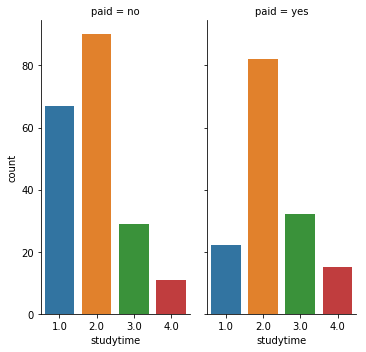

In [71]:
order = stud.paid.value_counts().index
sns.catplot(x='studytime', col = 'paid', col_order = order, kind ='count', data=stud, aspect = 0.5);

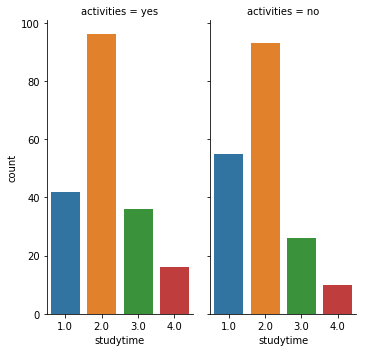

In [72]:
order = stud.activities.value_counts().index
sns.catplot(x='studytime', col = 'activities', col_order = order, kind ='count', data=stud, aspect = 0.5);

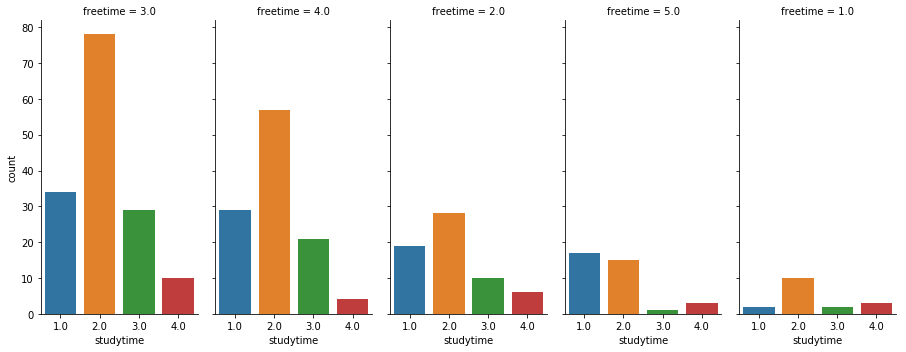

In [73]:
order = stud.freetime.value_counts().index
sns.catplot(x='studytime', col = 'freetime', col_order = order, kind ='count', data=stud, aspect = 0.5);

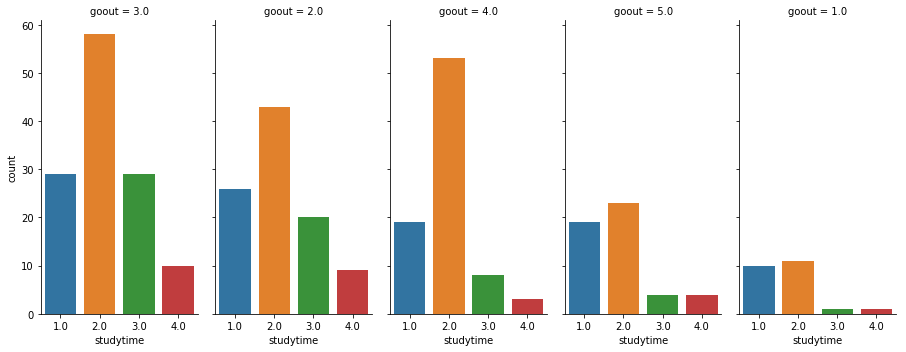

In [74]:
order = stud.goout.value_counts().index
sns.catplot(x='studytime', col = 'goout', col_order = order, kind ='count', data=stud, aspect = 0.5);

При просмотре графиков время на учебу помимо в неделю большинства 2-5 часов. И при просмотре зависимостей 2 в основно 
чаще встречается, поэтому проставлю всем пропускам значение 2.

In [75]:
stud.studytime = stud.studytime.fillna(2)

## Проанализируем failures - количество внеучебных неудач, также просмотрим пропуски

In [76]:
stud.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [77]:
stud.query('failures not in [0,1,2,3]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,T,3.0,3.0,other,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,1.0,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,other,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,T,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,GT3,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


давайте проверим зависимость от schoolsup, famsup, paid, famrel, absences 

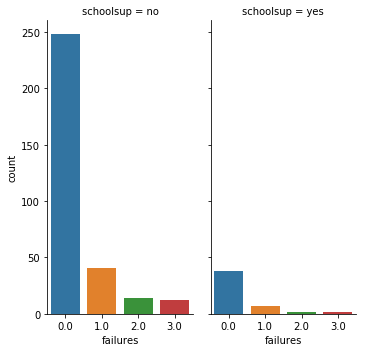

In [78]:
order = stud.schoolsup.value_counts().index
sns.catplot(x='failures', col = 'schoolsup', col_order = order, kind ='count', data=stud, aspect = 0.5);

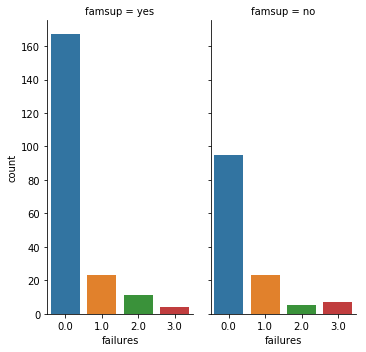

In [79]:
order = stud.famsup.value_counts().index
sns.catplot(x='failures', col = 'famsup', col_order = order, kind ='count', data=stud, aspect = 0.5);

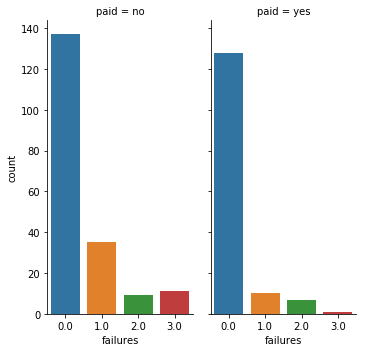

In [80]:
order = stud.paid.value_counts().index
sns.catplot(x='failures', col = 'paid', col_order = order, kind ='count', data=stud, aspect = 0.5);

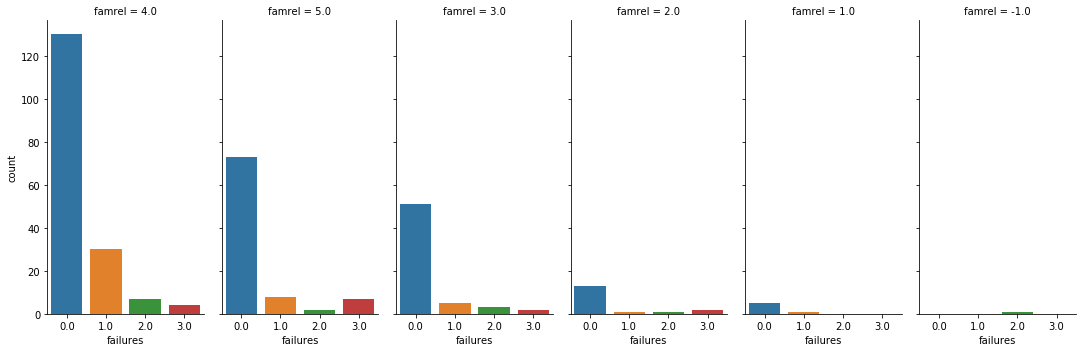

In [81]:
order = stud.famrel.value_counts().index
sns.catplot(x='failures', col = 'famrel', col_order = order, kind ='count', data=stud, aspect = 0.5);

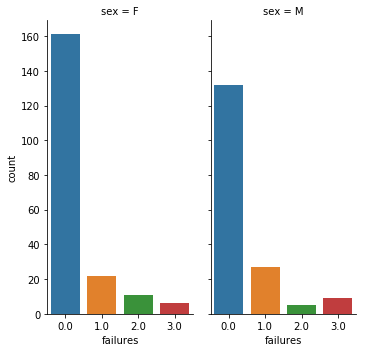

In [82]:
order = stud.sex.value_counts().index
sns.catplot(x='failures', col = 'sex', col_order = order, kind ='count', data=stud, aspect = 0.5);

При просмотре графиков не обнаружено какой -то явной зависимости и на всех графиках больше значения failures = 0. Поэтому
проставлю по умолчанию для пустых значений 0

In [83]:
stud.failures = stud.failures.fillna(0)

## Проанализирую schoolsup на уникальные значения и посмотрим на пустые строки и определим зависимости

In [84]:
stud.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [85]:
stud.query('schoolsup not in ["no", "yes"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,-3.0,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,home,father,1.0,1.0,0.0,NaN,no,no,no,yes,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


просмотрю зависимость от возраста, может в определенном классе есть подержка со стороны учителя по программе

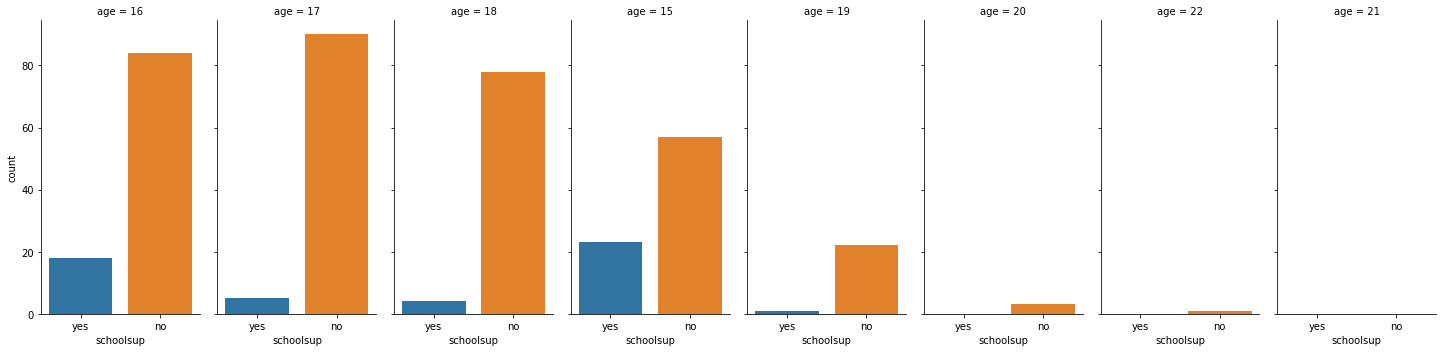

In [86]:
order = stud.age.value_counts().index
sns.catplot(x='schoolsup', col = 'age', col_order = order, kind ='count', data=stud, aspect = 0.5);

In [87]:
stud.query('schoolsup in ["yes"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,2.0,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
28,GP,M,16,U,LE3,T,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,-3.0,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,other,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0


Значение yes не много, и каких-то особеностей при просмотре датасета при yes нет. Проставлю для пустых значение no

In [88]:
stud.schoolsup = stud.schoolsup.fillna('no')

## famsup - есть пустые значения. посмотрим какие значения там на самом деле и проверим зависимости

In [89]:
stud.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

больше значения yes, проверим зависимость от famrel, Medu, Fedu, Pstatus, famsize 

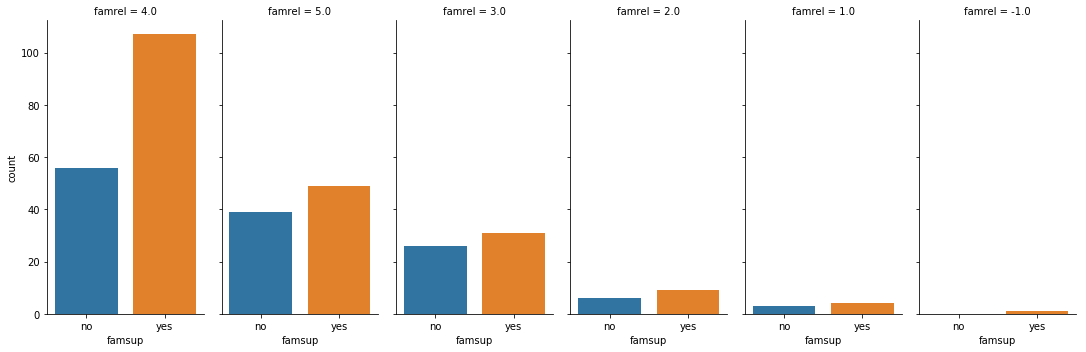

In [90]:
order = stud.famrel.value_counts().index
sns.catplot(x='famsup', col = 'famrel', col_order = order, kind ='count', data=stud, aspect = 0.5);

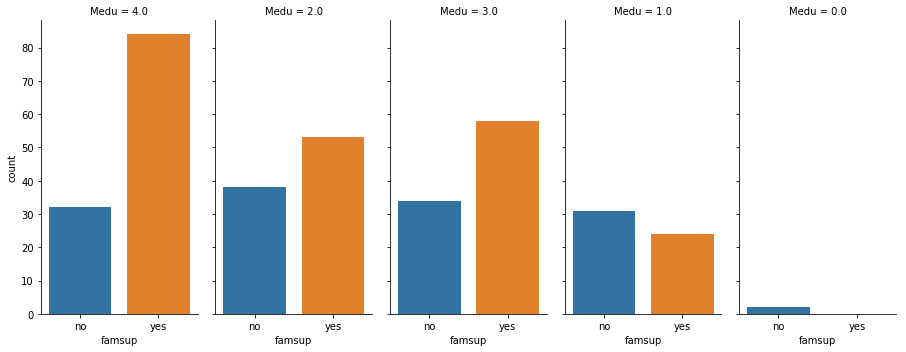

In [91]:
order = stud.Medu.value_counts().index
sns.catplot(x='famsup', col = 'Medu', col_order = order, kind ='count', data=stud, aspect = 0.5);

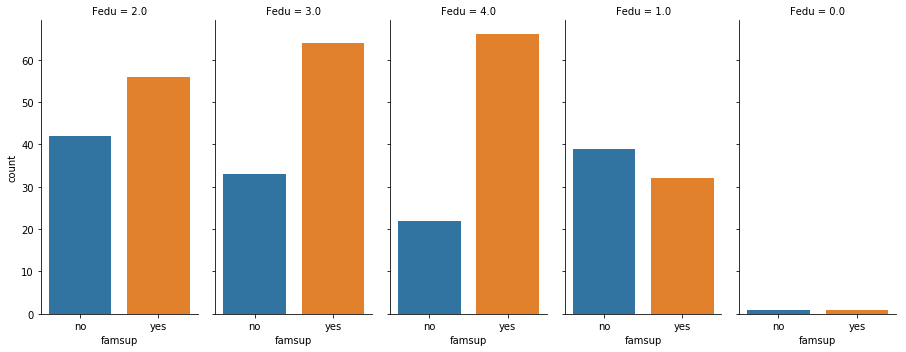

In [92]:
order = stud.Fedu.value_counts().index
sns.catplot(x='famsup', col = 'Fedu', col_order = order, kind ='count', data=stud, aspect = 0.5);

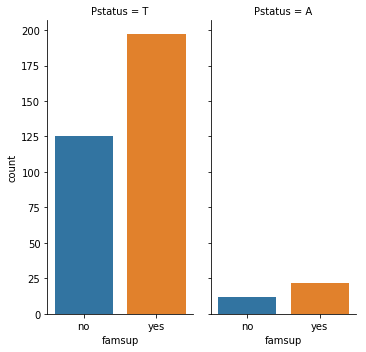

In [93]:
order = stud.Pstatus.value_counts().index
sns.catplot(x='famsup', col = 'Pstatus', col_order = order, kind ='count', data=stud, aspect = 0.5);

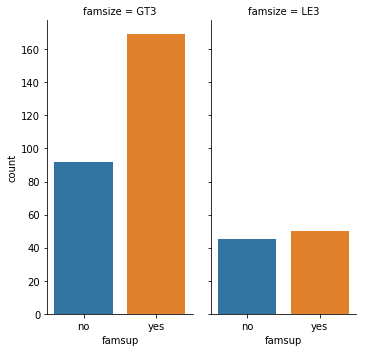

In [94]:
order = stud.famsize.value_counts().index
sns.catplot(x='famsup', col = 'famsize', col_order = order, kind ='count', data=stud, aspect = 0.5);

при анализе зависимостей в большинства значениях семейная подержка есть. Только если у образование у матери и отца менбше двух,
там значение no. Но разница не большая. Поэтому проставлю в пустых yes

In [95]:
stud.famsup = stud.famsup.fillna('yes')

## Проанализируем paid на значения, выбросы, пустые значения, поиск зависимостей

In [96]:
stud.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

посмотрим  на пустые значения может что-то необычное заметим

In [97]:
stud.query('paid not in ["no", "yes"]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,-3.0,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,other,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,yes,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,GP,M,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,GP,M,15,U,GT3,T,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


Надо просмотреть взаимосвязь с activities, higher, freetime, goout

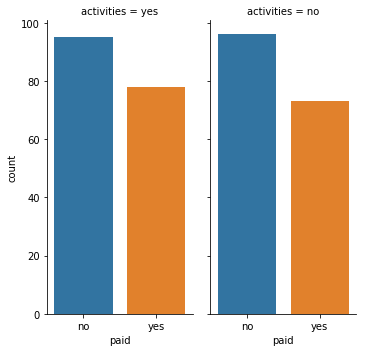

In [98]:
order = stud.activities.value_counts().index
sns.catplot(x='paid', col = 'activities', col_order = order, kind ='count', data=stud, aspect = 0.5);

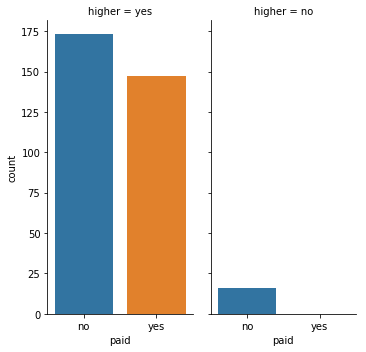

In [99]:
order = stud.higher.value_counts().index
sns.catplot(x='paid', col = 'higher', col_order = order, kind ='count', data=stud, aspect = 0.5);

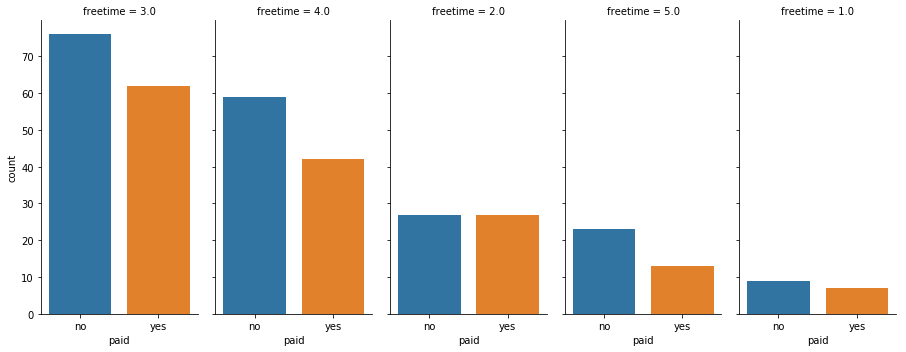

In [100]:
order = stud.freetime.value_counts().index
sns.catplot(x='paid', col = 'freetime', col_order = order, kind ='count', data=stud, aspect = 0.5);

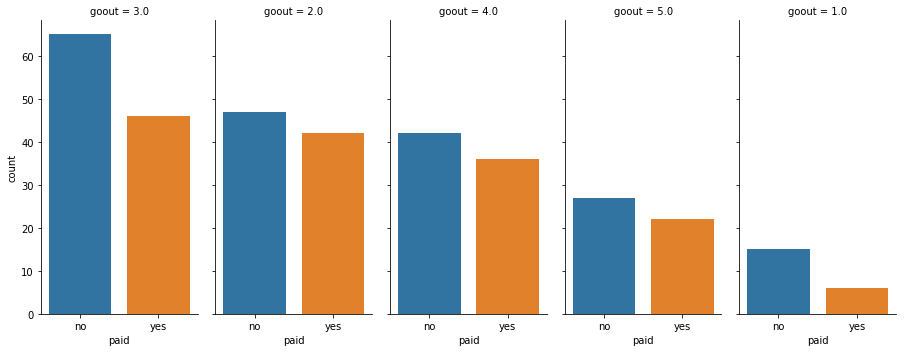

In [101]:
order = stud.goout.value_counts().index
sns.catplot(x='paid', col = 'goout', col_order = order, kind ='count', data=stud, aspect = 0.5);

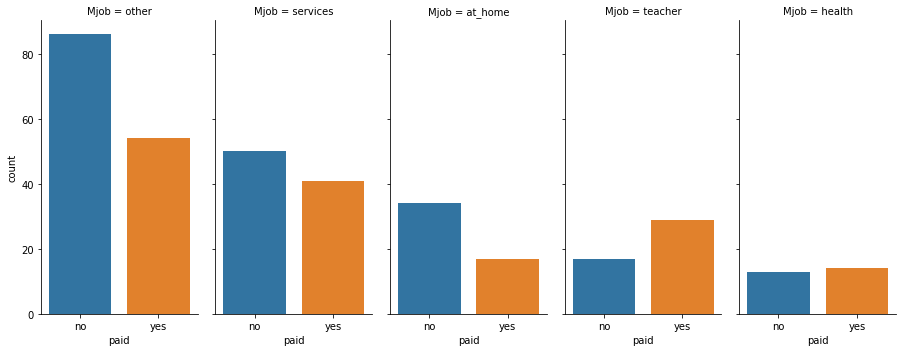

In [102]:
order = stud.Mjob.value_counts().index
sns.catplot(x='paid', col = 'Mjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

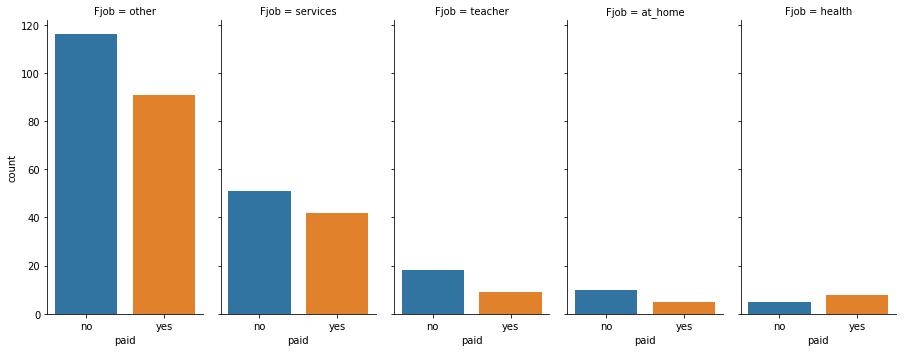

In [103]:
order = stud.Fjob.value_counts().index
sns.catplot(x='paid', col = 'Fjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

По показателям везде преобладает no, только если мама работает учителем выбирается доп. занятия но этот % не большой. Заполню no
Зависимостей не увидела.

In [104]:
stud.paid = stud.paid.fillna('no')

## Проанализируем activities пропусков не много, надо проверить на выбросы и зависимости для заполнения пустых значений

In [105]:
stud.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

Значений на половину, заполнить одним значением пропуски не удастся надо проверить зависимости от других показателей. Думаю
дополнительные внеучебные занятия зависят от свободного времени после школы (freetime), проведения времени с друзьями (goout), может зависит и от школы в городе она или за городом (за городом меньше секции чем в городе) (address). Может зависит от  дополнительные платные занятия по математике (paid) если у него есть занятия по математике, то меньше времени на другие доп. занятия.

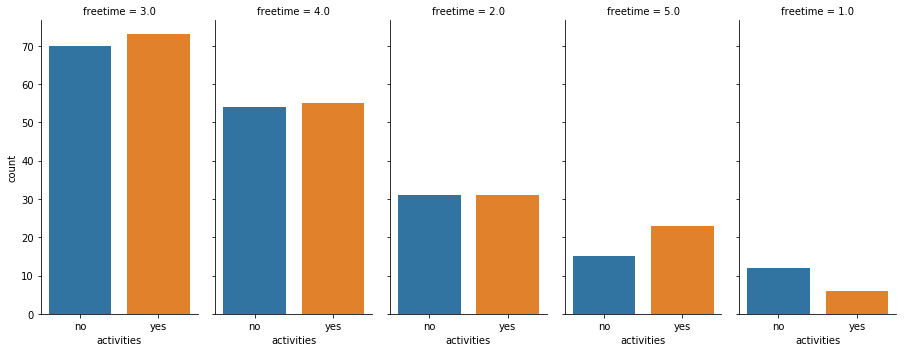

In [106]:
order = stud.freetime.value_counts().index
sns.catplot(x='activities', col = 'freetime', col_order = order, kind ='count', data=stud, aspect = 0.5);

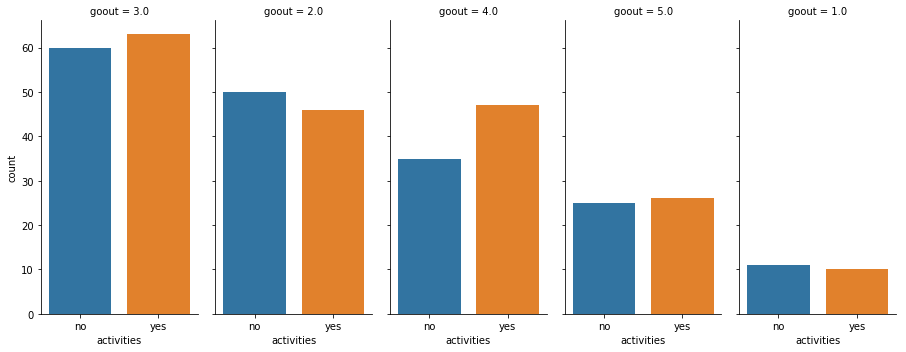

In [107]:
order = stud.goout.value_counts().index
sns.catplot(x='activities', col = 'goout', col_order = order, kind ='count', data=stud, aspect = 0.5);

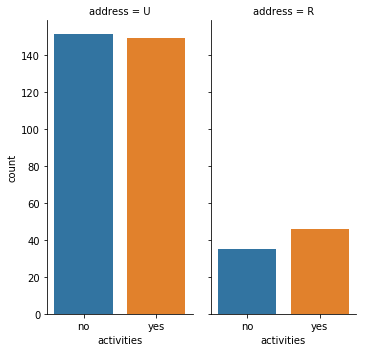

In [108]:
order = stud.address.value_counts().index
sns.catplot(x='activities', col = 'address', col_order = order, kind ='count', data=stud, aspect = 0.5);

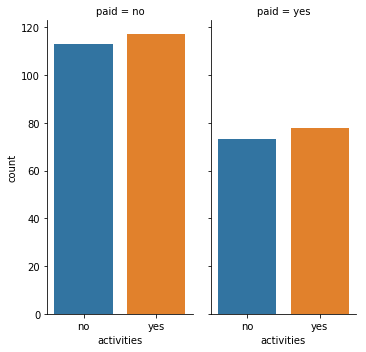

In [109]:
order = stud.paid.value_counts().index
sns.catplot(x='activities', col = 'paid', col_order = order, kind ='count', data=stud, aspect = 0.5);

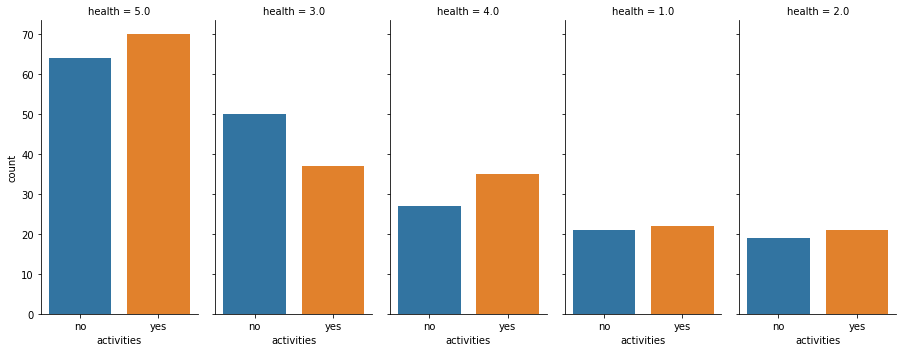

In [110]:
order = stud.health.value_counts().index
sns.catplot(x='activities', col = 'health', col_order = order, kind ='count', data=stud, aspect = 0.5);

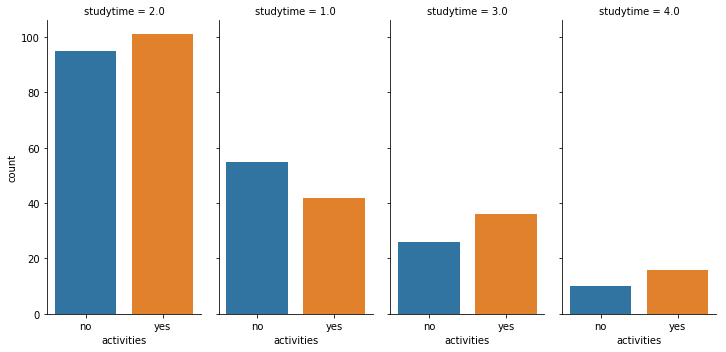

In [111]:
order = stud.studytime.value_counts().index
sns.catplot(x='activities', col = 'studytime', col_order = order, kind ='count', data=stud, aspect = 0.5);

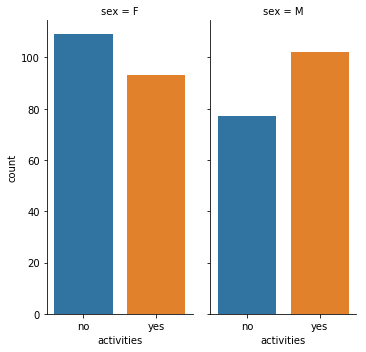

In [112]:
order = stud.sex.value_counts().index
sns.catplot(x='activities', col = 'sex', col_order = order, kind ='count', data=stud, aspect = 0.5);

есть небольшая зависимость от пола. У мальчиков больше внешкольных занятий чем у девочек. На основании этого создам функцию

In [113]:
def fill_activities(row):
    
    if pd.isnull(row.activities):
        if row.sex == 'F':
            return 'no'
        else:
            return 'yes'
    
    return row.activities

stud.activities = stud.apply(lambda row: fill_activities(row), axis=1)

## nursery - анализируем                

In [114]:
stud.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

посмотри на дата сет детей которые не посещали сад, может есть зависимость

In [115]:
stud.query('nursery == "no"')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,yes,no,yes,no,-6.0,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,-3.0,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,yes,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,mother,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,mother,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,yes,no,yes,no,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0


посмотрим зависимость от здоровья, 

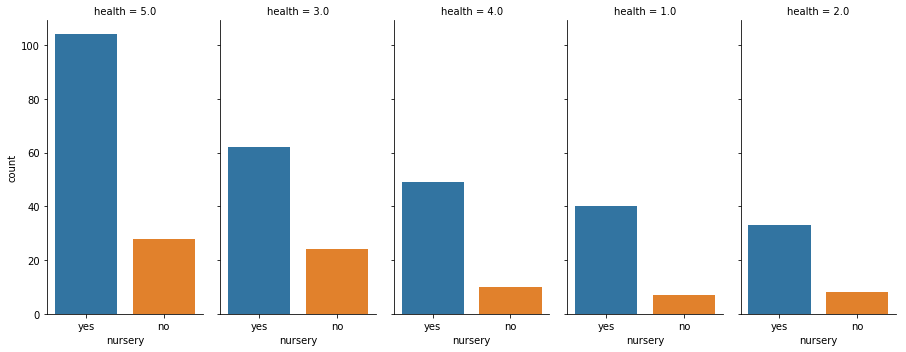

In [116]:
order = stud.health.value_counts().index
sns.catplot(x='nursery', col = 'health', col_order = order, kind ='count', data=stud, aspect = 0.5);

ни какой явной зависимости не вижу, проставлю для пустых значений yes

In [117]:
stud.nursery = stud.nursery.fillna('yes')

## Просмотрим  higher сколько значений есть ли пустые значения

In [118]:
stud.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [119]:
stud.query('higher == "no"')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,yes,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,yes,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,T,3.0,2.0,services,at_home,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,2.0,no,no,no,yes,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
163,GP,M,17,U,GT3,T,1.0,3.0,at_home,services,course,father,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,no,yes,no,5.0,3.0,3.0,2.0,2.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,no,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
165,GP,M,16,U,GT3,T,3.0,2.0,services,services,course,mother,2.0,1.0,1.0,no,yes,no,yes,no,-3.0,no,no,no,4.0,5.0,2.0,2.0,16.0,60.0
166,GP,M,16,U,GT3,T,2.0,2.0,other,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0


Может есть зависимость от studytime, schoolsup, paid

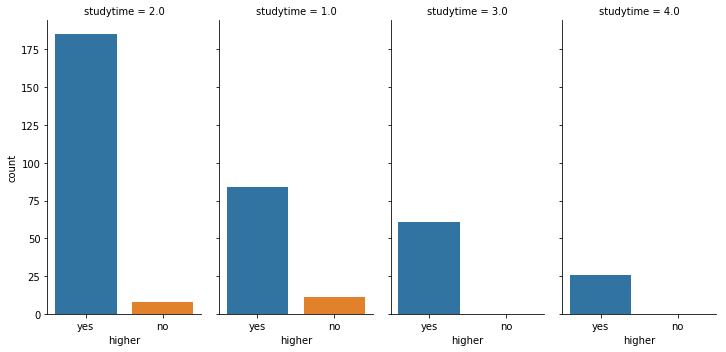

In [120]:
order = stud.studytime.value_counts().index
sns.catplot(x='higher', col = 'studytime', col_order = order, kind ='count', data=stud, aspect = 0.5);

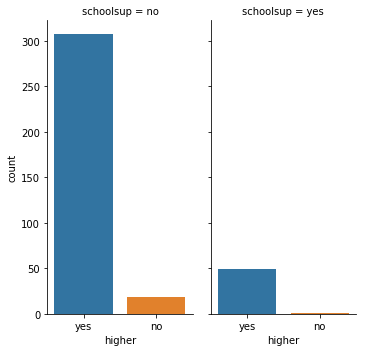

In [121]:
order = stud.schoolsup.value_counts().index
sns.catplot(x='higher', col = 'schoolsup', col_order = order, kind ='count', data=stud, aspect = 0.5);

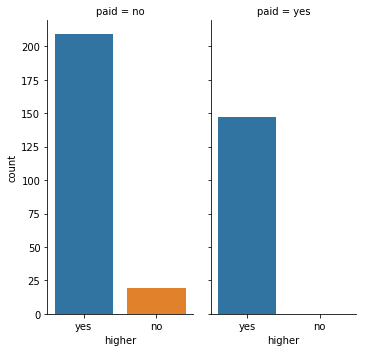

In [122]:
order = stud.paid.value_counts().index
sns.catplot(x='higher', col = 'paid', col_order = order, kind ='count', data=stud, aspect = 0.5);

зависимостей от других признаков не вижу проставлю yes как для большинства

In [123]:
stud.higher = stud.higher.fillna('yes')

## internet сколько значений есть ли пустые значения

In [124]:
stud.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

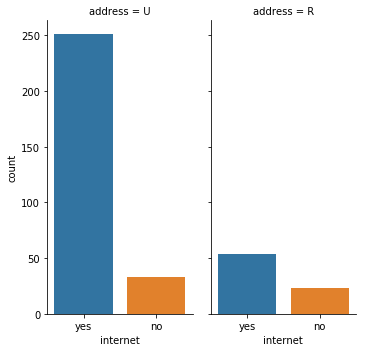

In [125]:
order = stud.address.value_counts().index
sns.catplot(x='internet', col = 'address', col_order = order, kind ='count', data=stud, aspect = 0.5);

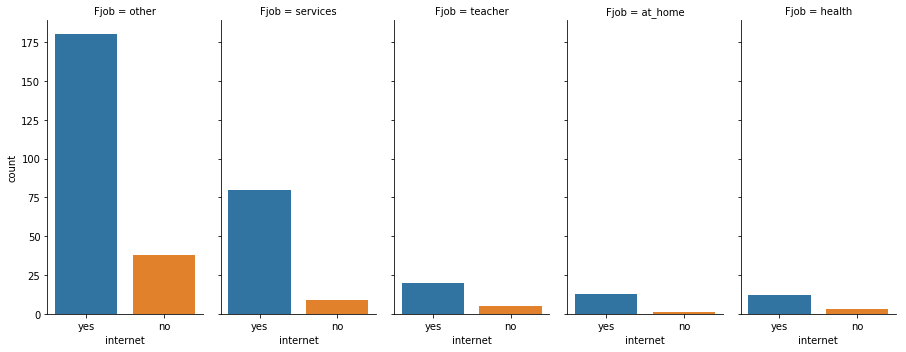

In [126]:
order = stud.Fjob.value_counts().index
sns.catplot(x='internet', col = 'Fjob', col_order = order, kind ='count', data=stud, aspect = 0.5);

internet - зависимостей от address и работы отца и матери нет. Проставлю значения yes. Так как больше встречается

In [127]:
stud.internet = stud.internet.fillna('yes')

## romantic - проврим значения заполним пустые значения

In [128]:
stud.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

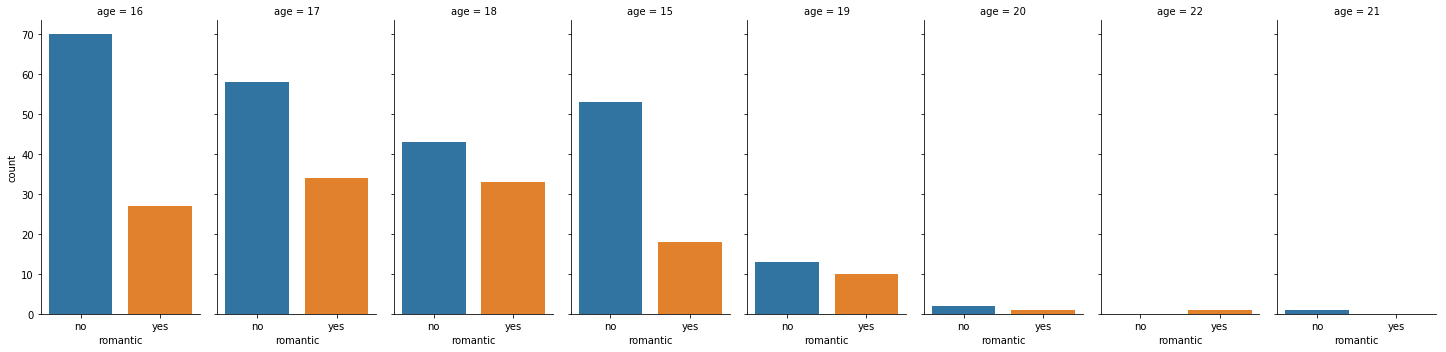

In [129]:
order = stud.age.value_counts().index
sns.catplot(x='romantic', col = 'age', col_order = order, kind ='count', data=stud, aspect = 0.5);

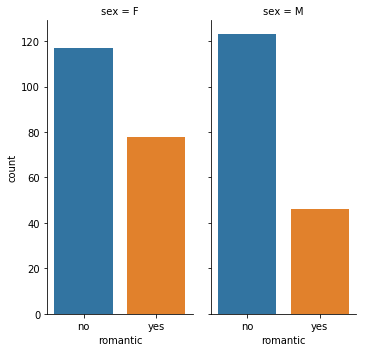

In [130]:
order = stud.sex.value_counts().index
sns.catplot(x='romantic', col = 'sex', col_order = order, kind ='count', data=stud, aspect = 0.5);

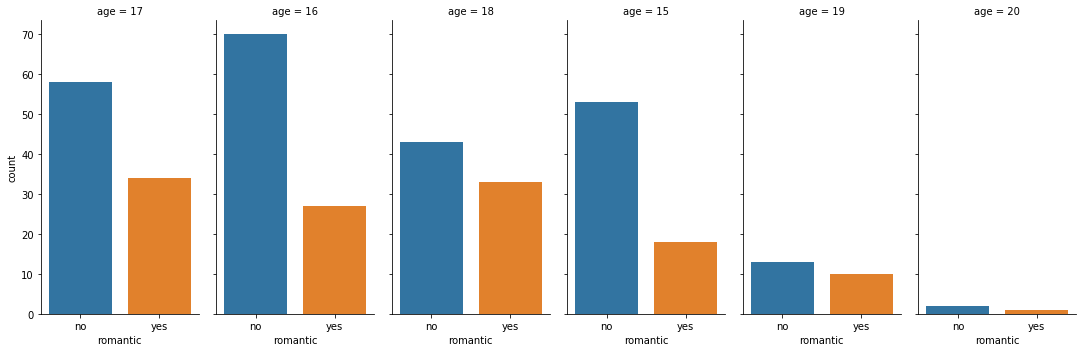

In [131]:
order = stud.query('sex=="F"').age.value_counts().index
sns.catplot(x='romantic', col = 'age', col_order = order, kind ='count', data=stud, aspect = 0.5);

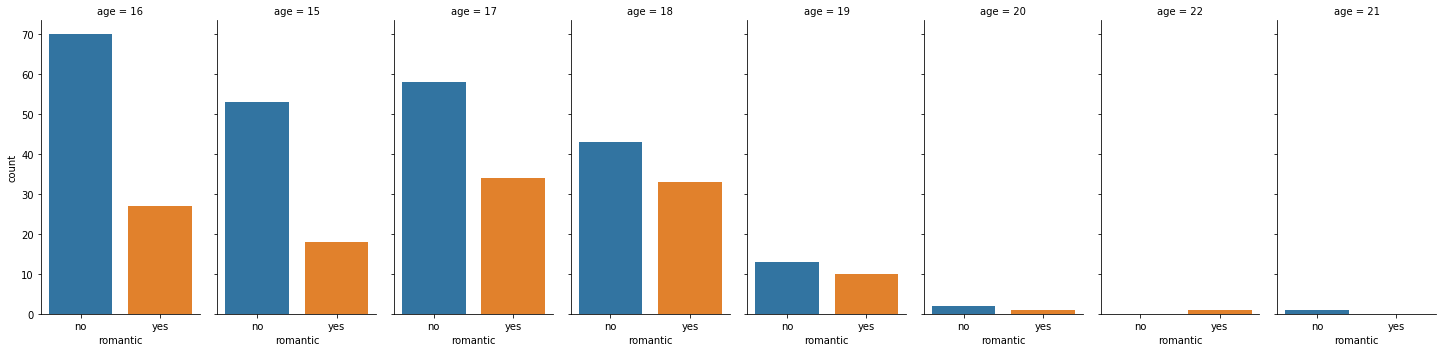

In [132]:
order = stud.query('sex=="M"').age.value_counts().index
sns.catplot(x='romantic', col = 'age', col_order = order, kind ='count', data=stud, aspect = 0.5);

По графику видно после 20 лет у учеников скорее всего есть романтические отношения, но так как учеников мало после 20 
нельзя точно сказать что да.

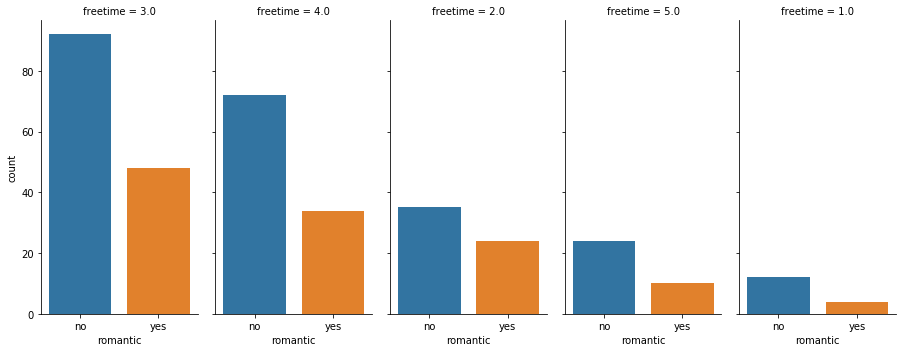

In [133]:
order = stud.freetime.value_counts().index
sns.catplot(x='romantic', col = 'freetime', col_order = order, kind ='count', data=stud, aspect = 0.5);

В большинстве no проставлю для пустых no

In [134]:
stud.romantic = stud.romantic.fillna('no')

## famrel - проврим значения заполним пустые значения

In [135]:
stud.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

есть значение -1 сорее всего это выброс посмотрим на него

In [136]:
stud.query('famrel ==-1')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


найдем зависимости семейных отношений от размера семьи (famsize), от статуса (Pstatus), и опекуна (guardian)

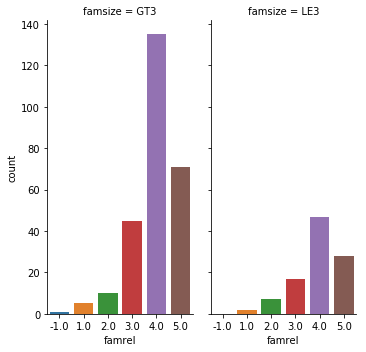

In [137]:
order = stud.famsize.value_counts().index
sns.catplot(x='famrel', col = 'famsize', col_order = order, kind ='count', data=stud, aspect = 0.5);

одинковые значения что для больше 3 что для меньше 3-ех

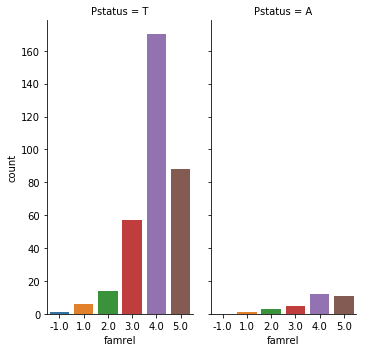

In [138]:
order = stud.Pstatus.value_counts().index
sns.catplot(x='famrel', col = 'Pstatus', col_order = order, kind ='count', data=stud, aspect = 0.5);

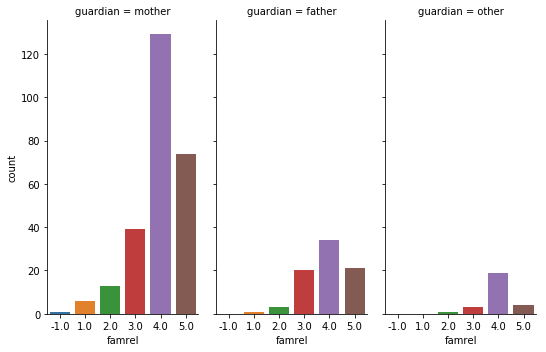

In [139]:
order = stud.guardian.value_counts().index
sns.catplot(x='famrel', col = 'guardian', col_order = order, kind ='count', data=stud, aspect = 0.5);

In [140]:
stud.famrel.mean()

3.9375

зависимостей не нашла заполню пропуски средним значением. И для значения -1 

In [141]:
stud.famrel = stud.famrel.fillna(4)

посмотрю на значения 1 и -1, может -1 это 1

In [142]:
stud.query('famrel < 2')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
108,GP,M,15,R,GT3,T,4.0,4.0,other,other,home,father,4.0,4.0,0.0,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
184,GP,F,16,U,GT3,T,3.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,1.0,2.0,2.0,1.0,14.0,60.0
207,GP,F,16,U,GT3,T,4.0,3.0,teacher,other,other,mother,1.0,2.0,0.0,no,no,yes,no,yes,-6.0,yes,yes,yes,1.0,3.0,2.0,1.0,10.0,65.0
299,GP,M,18,U,LE3,T,4.0,4.0,teacher,teacher,home,mother,1.0,1.0,0.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,1.0,4.0,2.0,1.0,5.0,80.0
357,MS,F,17,U,LE3,T,3.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0


Наверное -1 это 1 ошиблись при заполнении анкеты

In [143]:
stud.famrel = stud.famrel.apply(lambda x: 1 if x==-1 else x)

## freetime -  проверим значения заполним пустые значения

In [144]:
stud.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

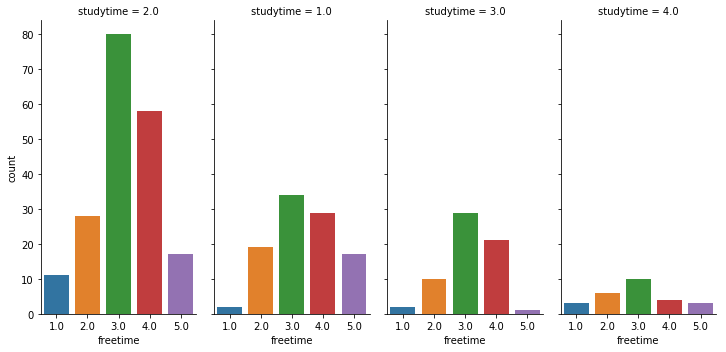

In [145]:
order = stud.studytime.value_counts().index
sns.catplot(x='freetime', col = 'studytime', col_order = order, kind ='count', data=stud, aspect = 0.5);

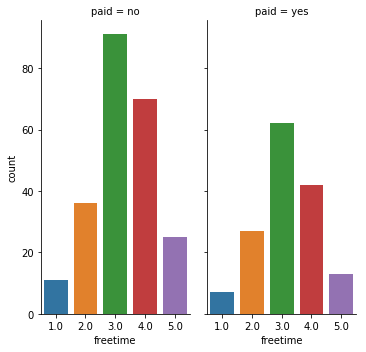

In [146]:
order = stud.paid.value_counts().index
sns.catplot(x='freetime', col = 'paid', col_order = order, kind ='count', data=stud, aspect = 0.5);

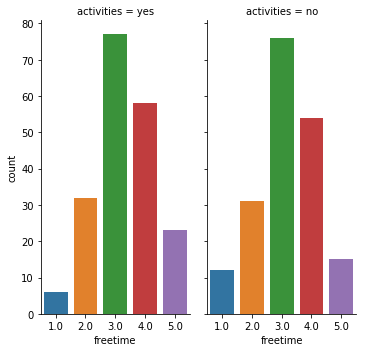

In [147]:
order = stud.activities.value_counts().index
sns.catplot(x='freetime', col = 'activities', col_order = order, kind ='count', data=stud, aspect = 0.5);

In [148]:
stud.freetime.median()

3.0

заполню пропуски медианым значением 3

In [149]:
stud.freetime = stud.freetime.fillna(3)

## goout  - проверим на пустые значения

In [150]:
stud.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

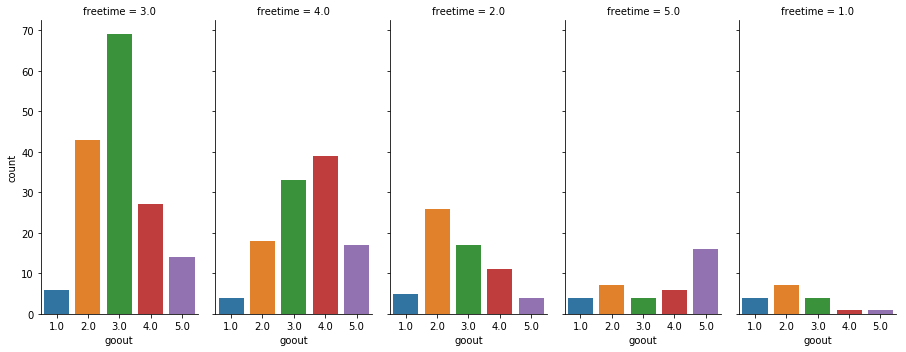

In [151]:
order = stud.freetime.value_counts().index
sns.catplot(x='goout', col = 'freetime', col_order = order, kind ='count', data=stud, aspect = 0.5);

есть зависимость от свободного времени. Для пустых значении проставим такие же значения как для freetime

In [152]:
def fill_goout(row):
    
    if pd.isnull(row.goout):
        return row.freetime
    
    return row.goout


stud.goout = stud.apply(lambda row: fill_goout(row), axis=1)


## health - проверим на пустые значения

In [153]:
stud.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [154]:
stud.query('health not in [1,2,3,4,5]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,-6.0,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,other,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,T,3.0,2.0,services,at_home,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,no,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,1.0,0.0,no,yes,yes,no,yes,-3.0,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,GP,M,17,U,LE3,T,2.0,2.0,other,other,home,father,1.0,2.0,0.0,no,no,no,yes,no,-6.0,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0


проставлю медианым значением

In [155]:
stud.health = stud.health.fillna(stud.health.median())

## absences  - проверим на значения и заполним пропуски. при заполнении проверим зависимости

In [156]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

проверим на выбросы

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

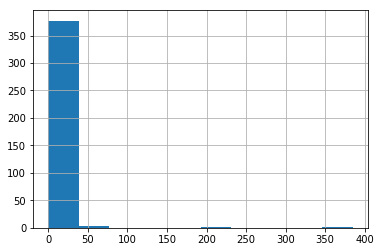

In [157]:
stud.absences.hist()
stud.absences.describe()

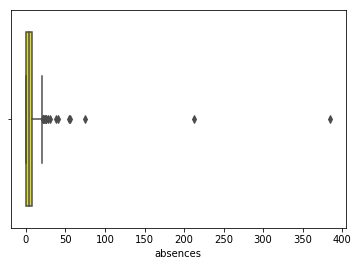

In [158]:
sns.boxplot(stud.absences, color='yellow');

есть выбросы для кол-ва 212 и 385 либо это ошибка при заполнении либо сбои в программе. Интересно это пропуски за год или за все время учебы с 15 до 22. Посмотрим на строки с выбросами


In [159]:
stud.query('absences in [212, 385]')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Никаких явных различий нет, есть школьная подержка и семейная, значит ученик учится испарвно, здоровья у учеников хорошее,
поэтому пропуски по болезням нет. Хотят получить высшее образование. Такое кол-во пропусков говорит что они потеряли 
целый год учебы, при котором их сразу бы отчислили.  studytime среднее значит они не отстают от программы. Думаю что кол-во пропусков больше 150 не может быть, т.к. это почти год пропусков занятий по математике. Получается что ученик пропустил год занятий по математике, удалим эти значения.


In [160]:
stud = stud.loc[stud.absences < 150]

Посмотрим на пустые значения.

In [161]:
import numpy as np
stud[np.isnan(stud.absences)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


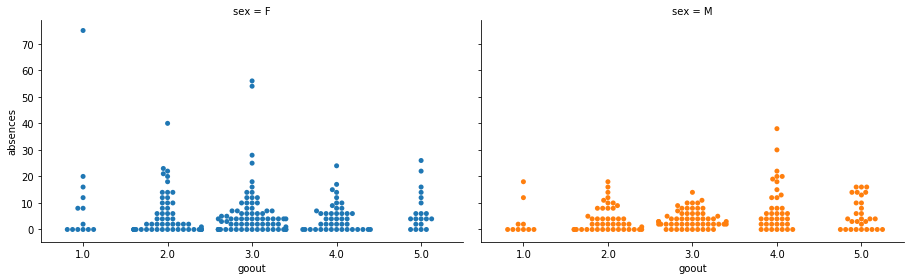

In [162]:
sns.catplot(x="goout", y="absences",
                hue="sex", col="sex",
                data=stud, kind="swarm",
                height=4, aspect=1.6);

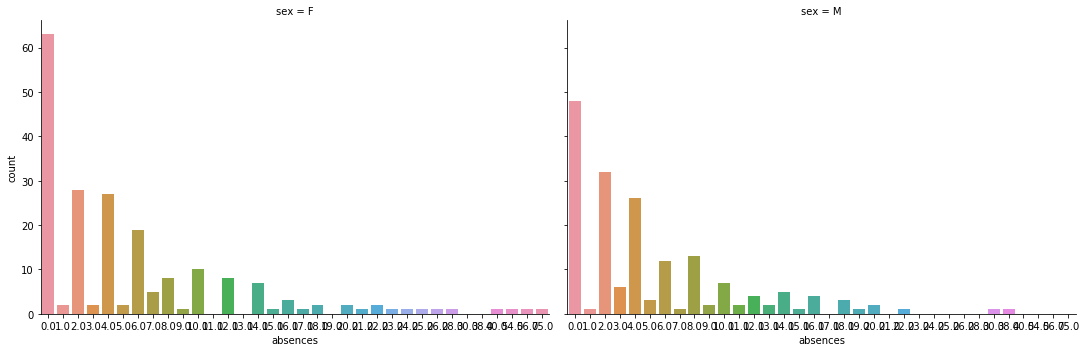

In [163]:
stud_absences = stud.query("absences < 100")
order = stud_absences.sex.value_counts().index
sns.catplot(x='absences', col = 'sex', col_order = order, kind ='count', data=stud_absences, aspect = 1.5);

In [164]:
stud.sex.value_counts()

F    203
M    178
Name: sex, dtype: int64

Кол-во 0 пропусков у девочек меньше чем у мальчиков, это может быть из-за того что девочек в выборке больше. По графику кол-во пропусков различаются поэтому посмотрим на медианые значения в зависимости от пола, при этом исключим из расчета выбросы. Значения больше 50

In [165]:
stud.query('absences<50').groupby('sex')['absences'].median()

sex
F    4.0
M    4.0
Name: absences, dtype: float64

Медианные значения у девочек и мальчиков одинаковые. поэтому проставим для пропущенных значений медианое значение

In [166]:
stud.absences = stud.absences.fillna(stud.absences.median())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## В датасет есть еще переменная studytime, granular, которой не было в документации посмотрим на значения в даной колонке

In [167]:
stud['studytime, granular'].value_counts()

-6.0     187
-3.0     100
-9.0      62
-12.0     27
Name: studytime, granular, dtype: int64

In [168]:
stud['studytime'].value_counts()

2.0    192
1.0    100
3.0     62
4.0     27
Name: studytime, dtype: int64

Странно 'studytime' и 'studytime, granular' одинаковы по кол-ву уникальных значений. Посмотим на график взаимосвзи.

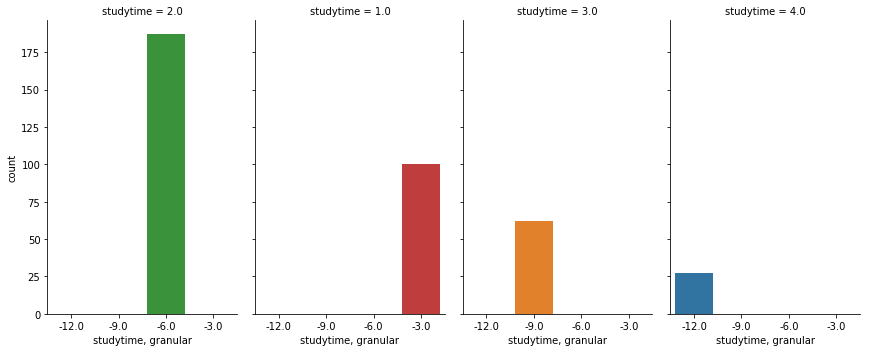

In [169]:
order = stud_absences.studytime.value_counts().index
sns.catplot(x='studytime, granular', col = 'studytime', col_order = order, kind ='count', data=stud, aspect = .6);

In [170]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.162153,-0.165249,0.089164,-0.002262,0.198914,0.002322,0.056166,0.017633,0.123775,-0.071144,0.166773,-0.149349
Medu,-0.162153,1.000000,0.655267,-0.173464,0.065091,-0.236433,-0.065377,-0.024902,0.013725,0.039693,-0.061780,0.096825,0.202760
Fedu,-0.165249,0.655267,1.000000,-0.141990,-0.015734,-0.252456,0.016155,-0.030476,-0.002471,0.040245,0.024938,0.057754,0.122484
traveltime,0.089164,-0.173464,-0.141990,1.000000,-0.098825,0.063237,0.099741,-0.026025,-0.006397,0.049898,-0.033798,-0.002066,-0.059922
studytime,-0.002262,0.065091,-0.015734,-0.098825,1.000000,-0.157519,-1.000000,0.031275,-0.122426,-0.046500,-0.077317,-0.067633,0.107912
failures,0.198914,-0.236433,-0.252456,0.063237,-0.157519,1.000000,0.158747,-0.007347,0.094939,0.093811,0.066414,0.065398,-0.319272
"studytime, granular",0.002322,-0.065377,0.016155,0.099741,-1.000000,0.158747,1.000000,-0.031633,0.123935,0.046963,0.077904,0.067734,-0.108754
famrel,0.056166,-0.024902,-0.030476,-0.026025,0.031275,-0.007347,-0.031633,1.000000,0.165135,0.077949,0.084788,-0.044169,0.057242
freetime,0.017633,0.013725,-0.002471,-0.006397,-0.122426,0.094939,0.123935,0.165135,1.000000,0.315368,0.047017,-0.071617,0.013032
goout,0.123775,0.039693,0.040245,0.049898,-0.046500,0.093811,0.046963,0.077949,0.315368,1.000000,-0.018028,0.027249,-0.127218


Признаки 'studytime, granular' и 'studytime' скоррелированы полностью, то избавимся от одного признака например 
'studytime, granular'.

In [171]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## score - целевая переменная. Посмотрим какие значения она принимает.

In [172]:
stud.score.value_counts()

50.0     53
55.0     46
0.0      36
75.0     31
65.0     31
40.0     29
60.0     29
70.0     27
45.0     26
80.0     16
30.0     15
90.0     11
35.0      9
25.0      7
95.0      5
85.0      3
100.0     1
20.0      1
Name: score, dtype: int64

Из данных понятно что оценка может принимать значения от 0 - 100. Посмотрим на распределение в графике.

count    376.000000
mean      51.968085
std       22.797287
min        0.000000
25%       40.000000
50%       55.000000
75%       66.250000
max      100.000000
Name: score, dtype: float64

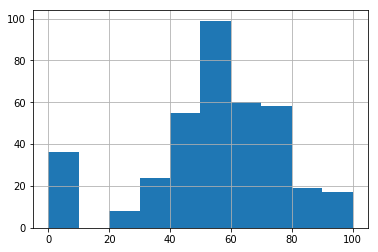

In [173]:
stud.score.hist()
stud.score.describe()

По графику большинства учеников получают оценки в районе 50. Но есть выбросы оценки со значением 0. Посмтроим бохплот

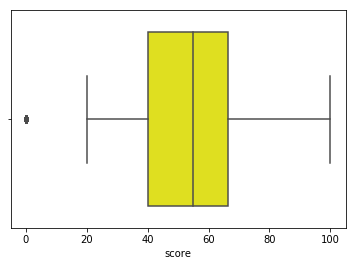

In [174]:
sns.boxplot(stud.score, color='yellow');

Надо посмотреть на данные почему так много учеников с оценкой 0

In [175]:
stud.query('score == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,T,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,no,no,yes,yes,no,no,4.0,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,3.0,other,other,course,other,1.0,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,course,father,2.0,4.0,0.0,yes,yes,no,yes,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,yes,no,no,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


В данных каких-то явных отличий нет. Может они пропустили гос. экзамен по причине болезни. А может это значения null. 
Но данных с 0 оценкой много а выборка не большая 393. Поэтому удалять данные не буду. Оставлю посмотрим на корелляцию. 
Еще в оценка есть пропуски посмотрим на данные, может в них есть что-то особенное.

In [176]:
stud[np.isnan(stud.score)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,no,no,4.0,3.0,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,5.0,3.0,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,5.0,4.0,3.0,NaN
350,MS,M,19,U,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,yes,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Пропусков не много. Но т.к. эта целевая переменая, то заполнять  не буду, удалю. Т.к. думаю при заполнении
целевой переменной могу исказить модель.

In [177]:
stud = stud.dropna(subset = ['score'], axis = 0)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 29 columns):
school        376 non-null object
sex           376 non-null object
age           376 non-null int64
address       376 non-null object
famsize       376 non-null object
Pstatus       376 non-null object
Medu          376 non-null float64
Fedu          376 non-null float64
Mjob          376 non-null object
Fjob          376 non-null object
reason        376 non-null object
guardian      376 non-null object
traveltime    376 non-null float64
studytime     376 non-null float64
failures      376 non-null float64
schoolsup     376 non-null object
famsup        376 non-null object
paid          376 non-null object
activities    376 non-null object
nursery       376 non-null object
higher        376 non-null object
internet      376 non-null object
romantic      376 non-null object
famrel        376 non-null float64
freetime      376 non-null float64
goout         376 non-null float64
heal

Выясним, какие столбцы коррелируют с баллами по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов. age, absences, score.   


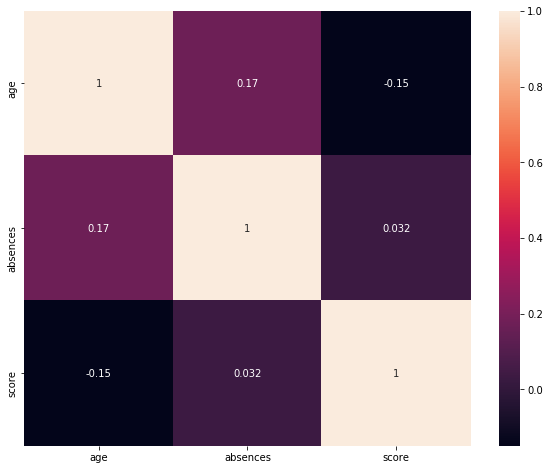

In [178]:
import matplotlib.pyplot as plt

correlation = stud.loc[:,['age','absences','score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True);

Мультиколлениарности между признаками нет. У absences очень маленькое влияение на score. 

Посмортим на зависимость категориальных признаков от целевой переменной на графиках.


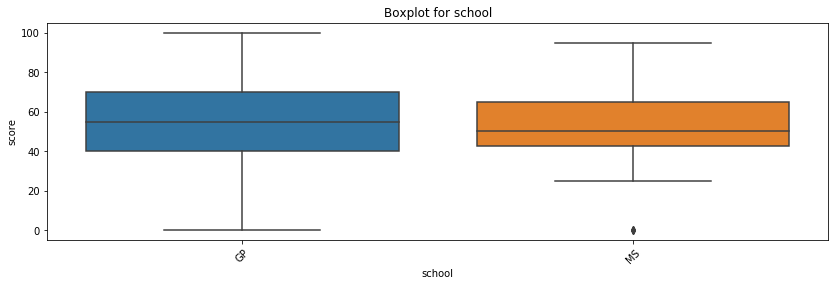

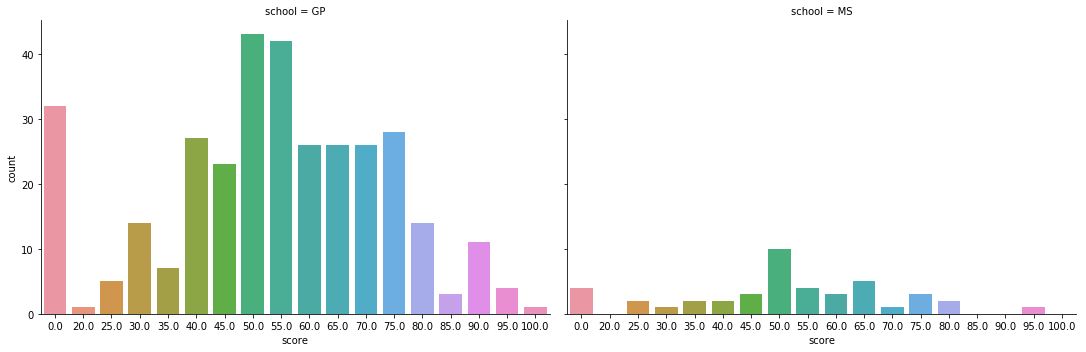

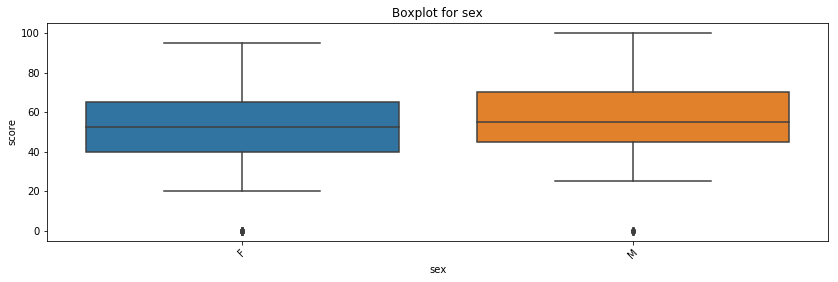

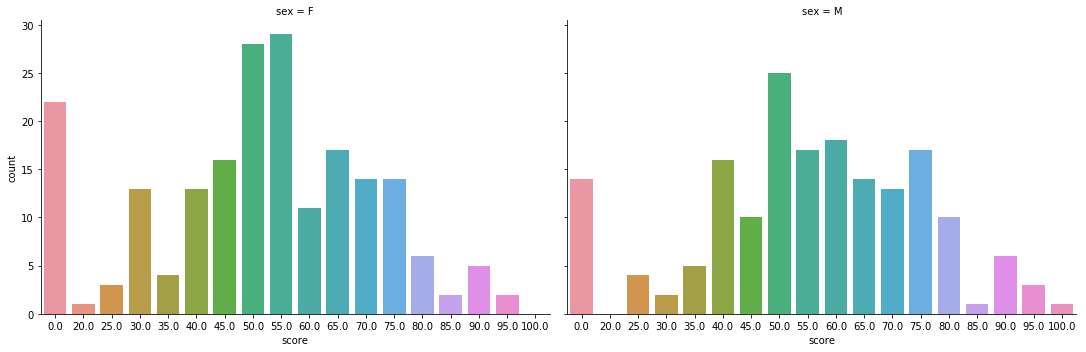

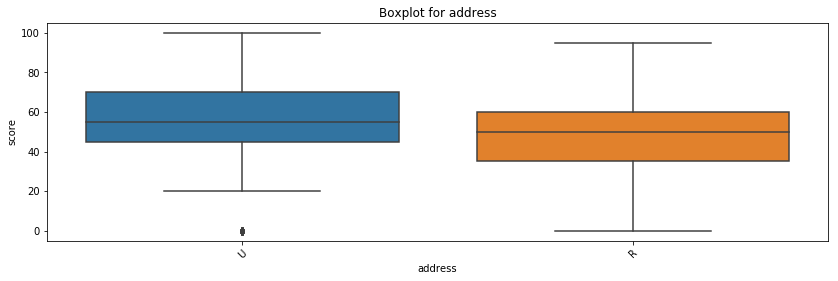

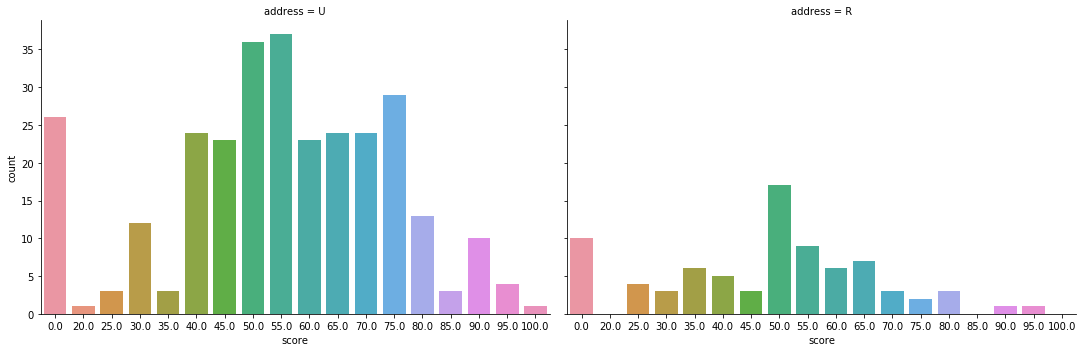

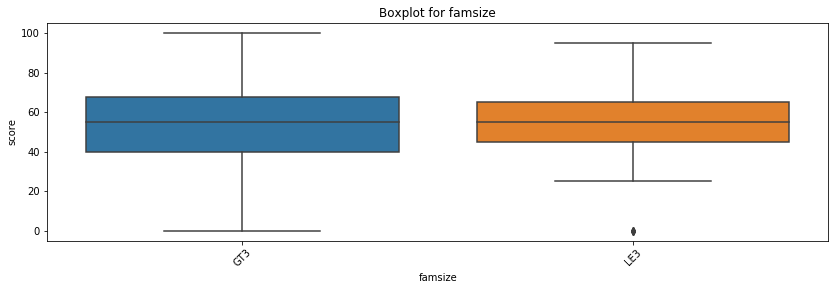

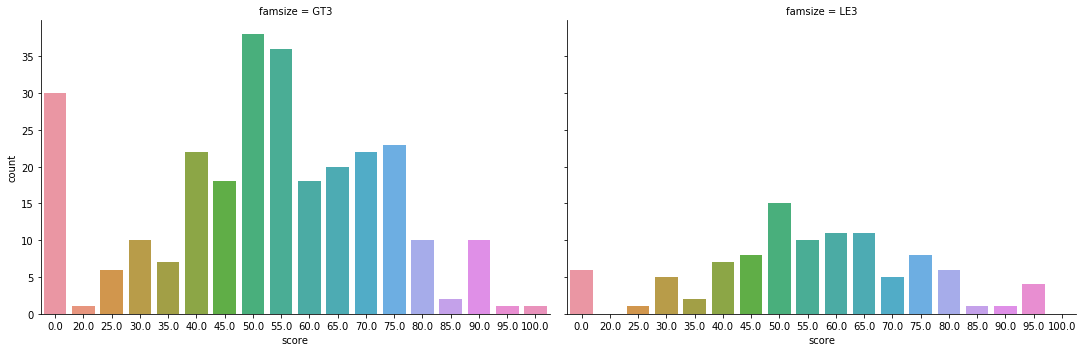

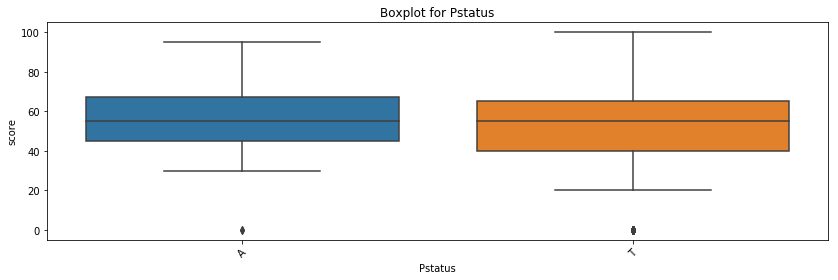

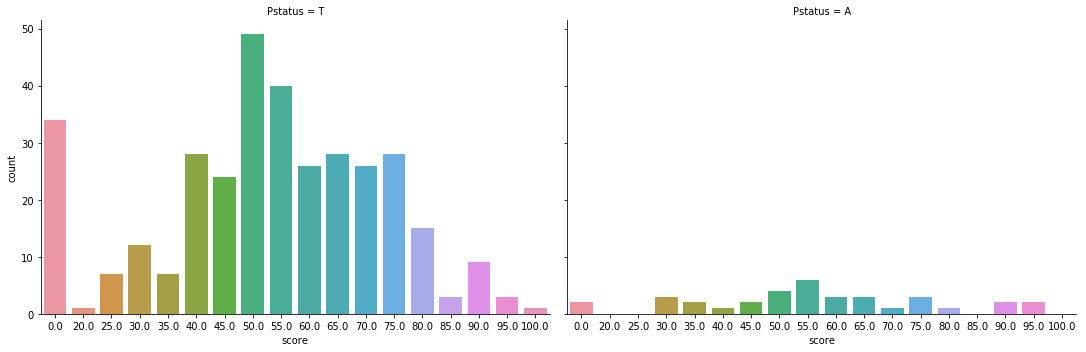

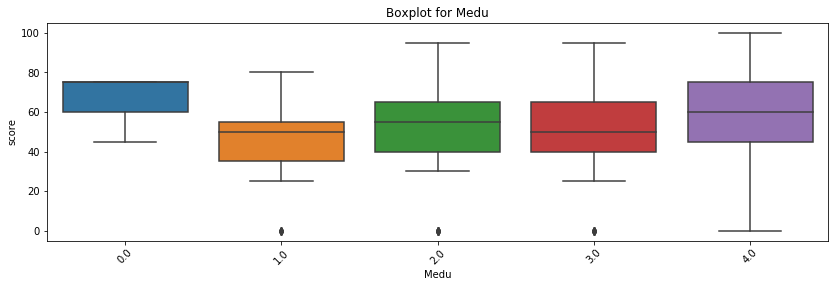

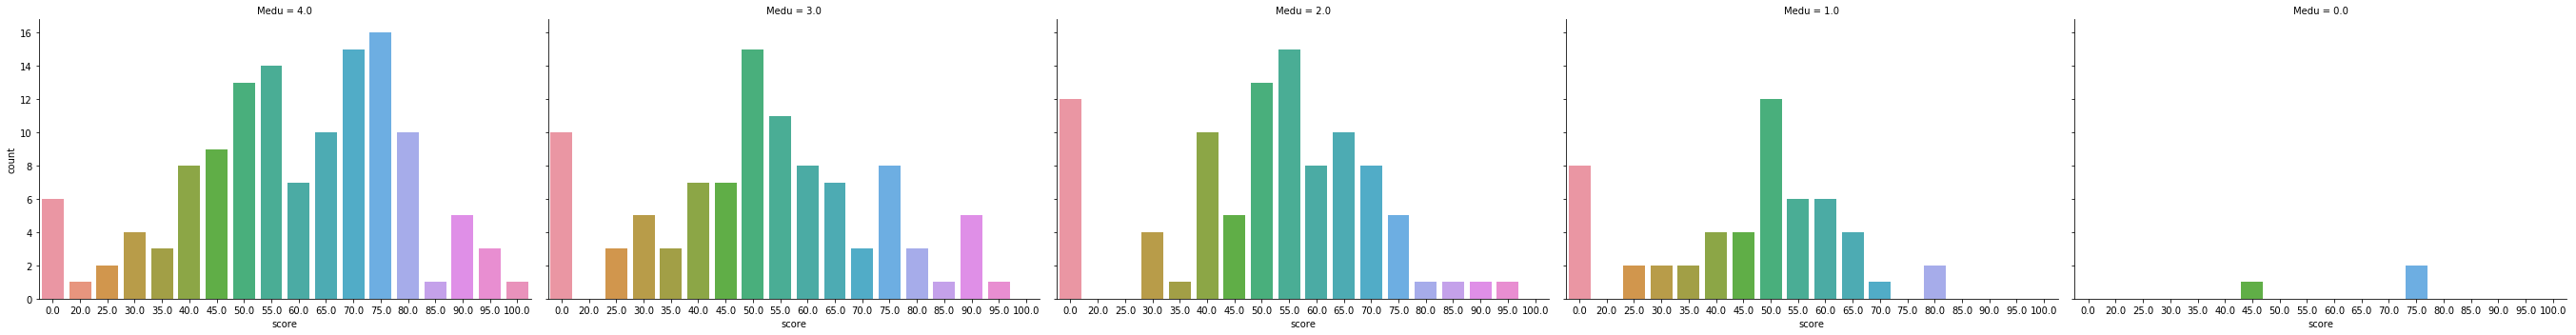

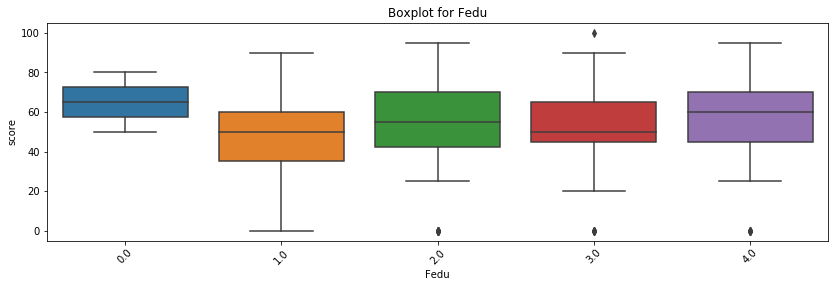

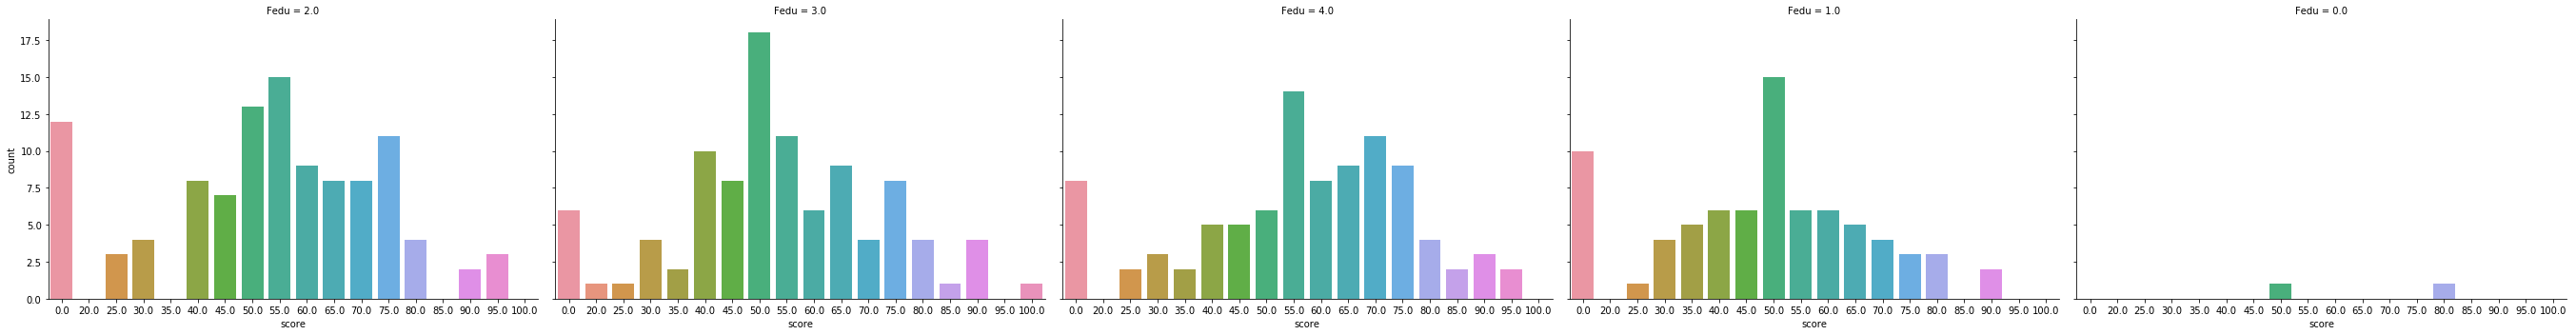

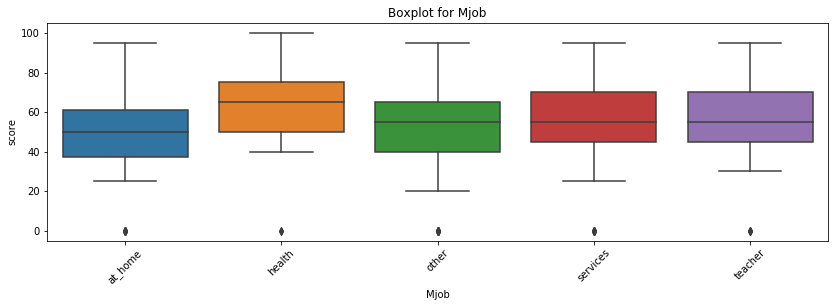

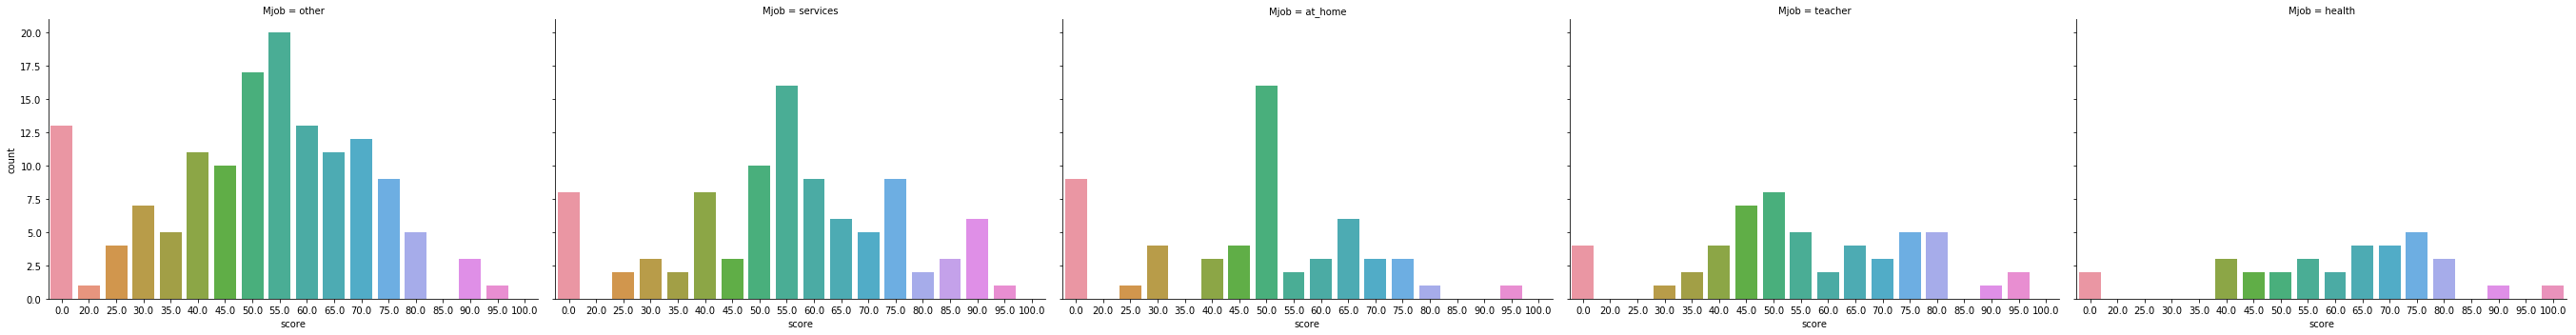

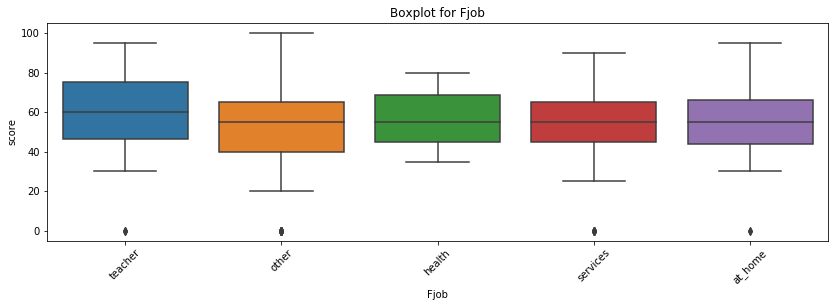

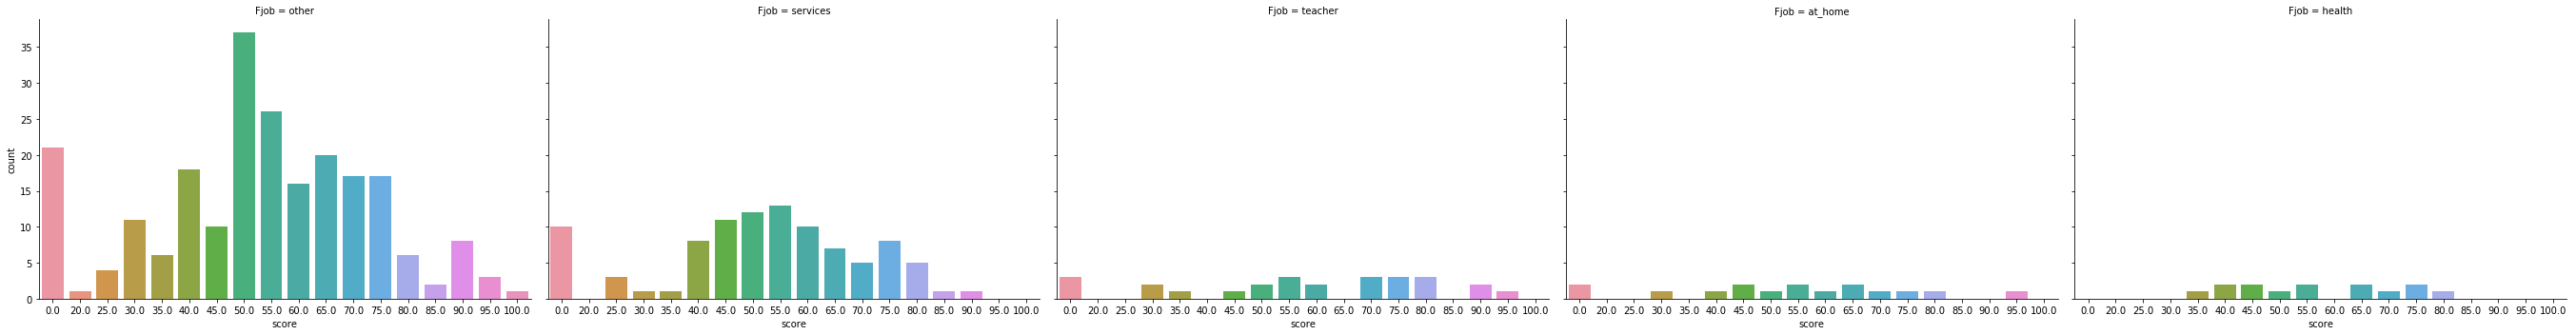

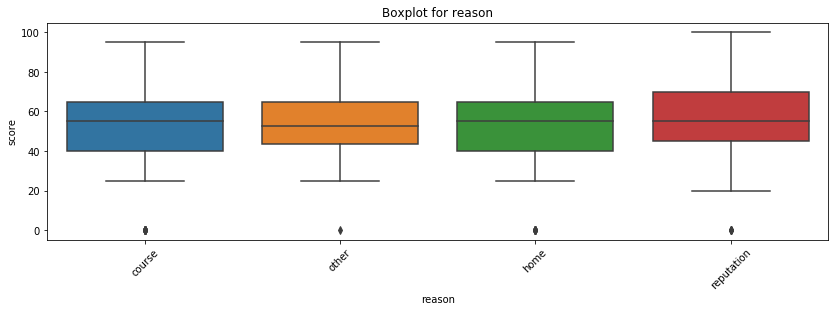

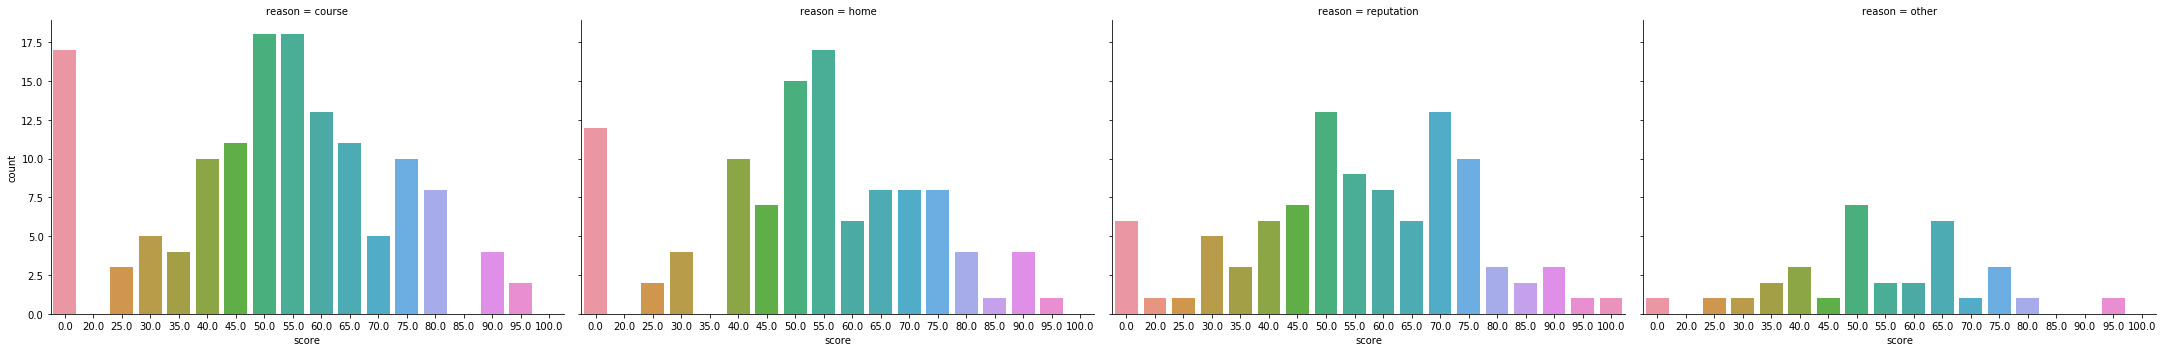

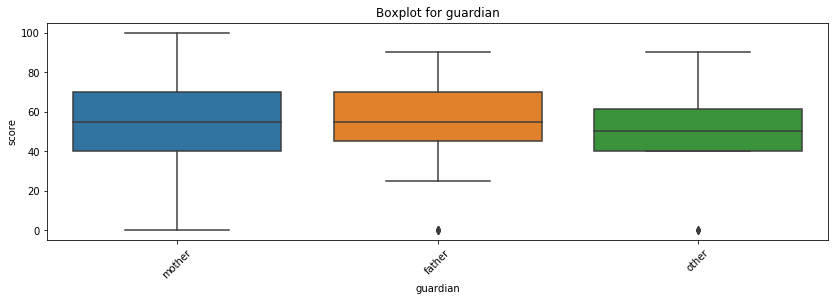

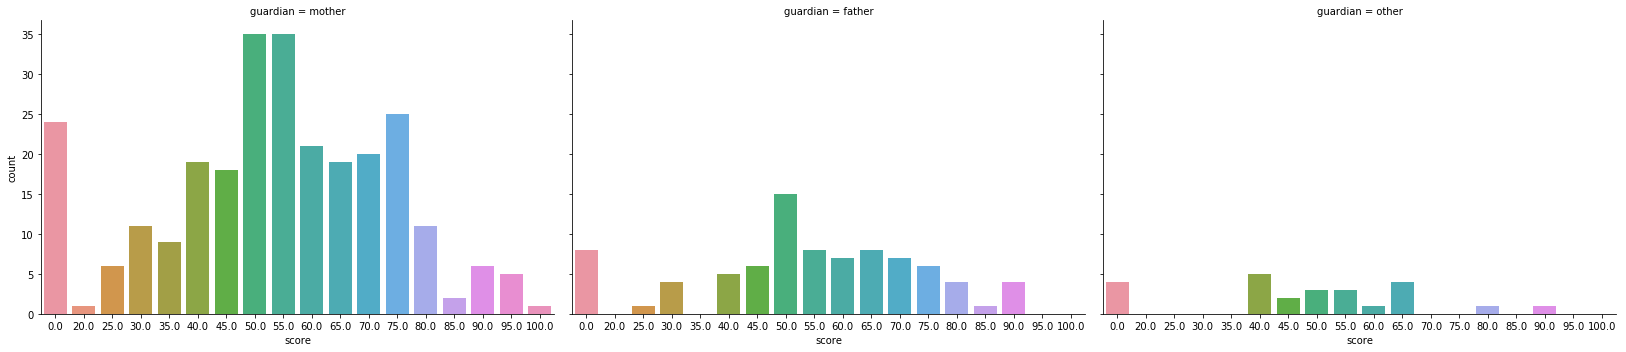

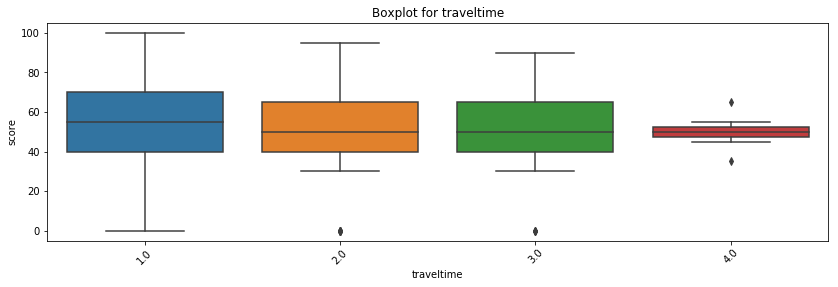

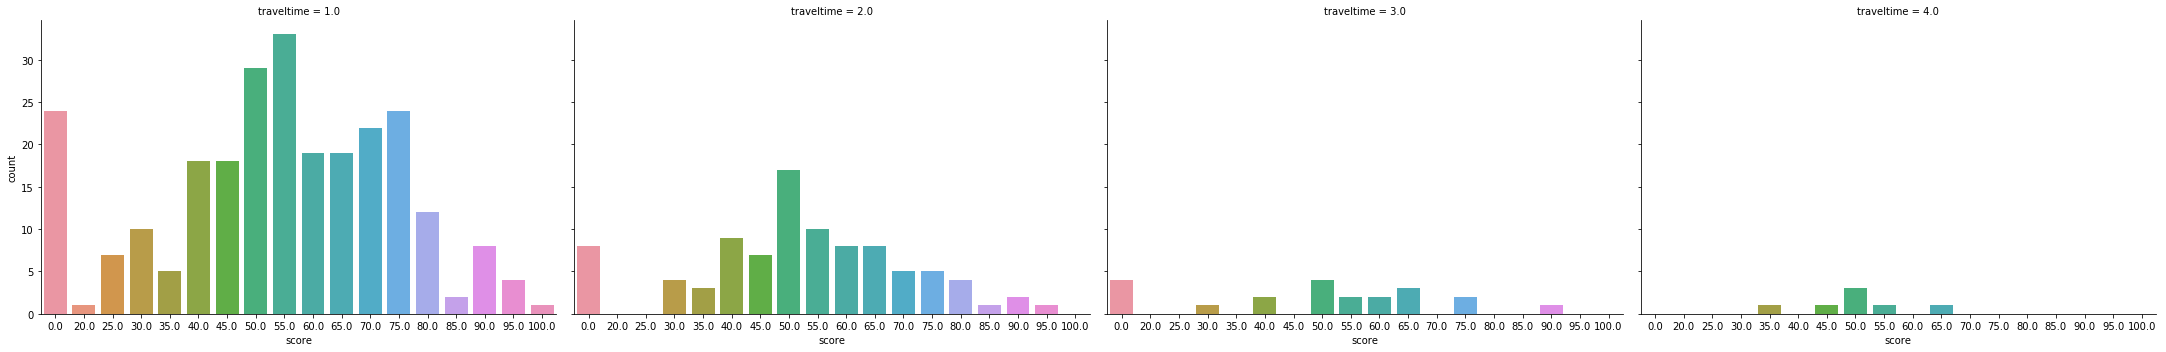

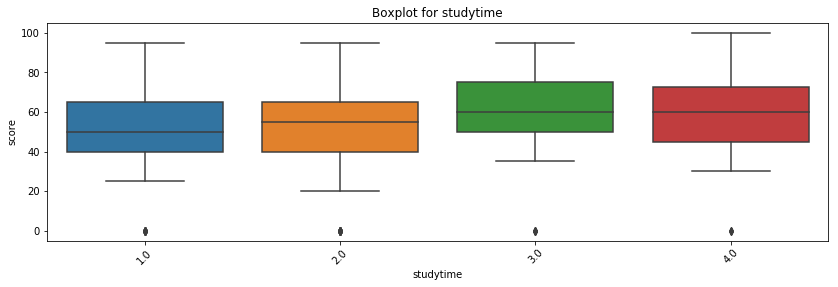

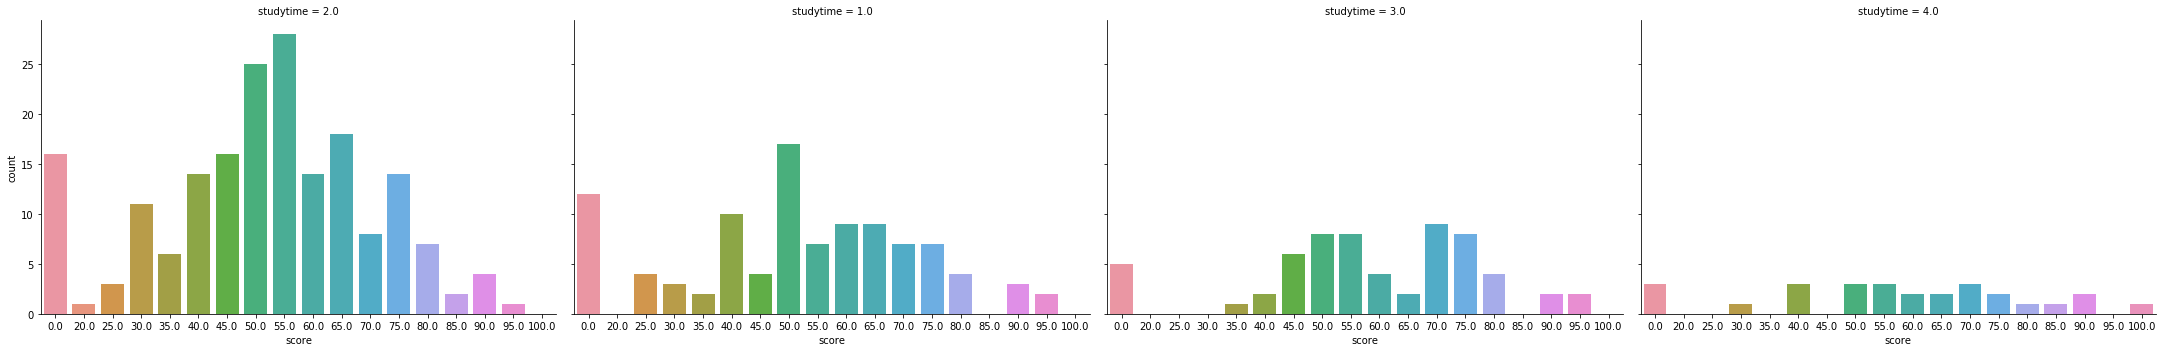

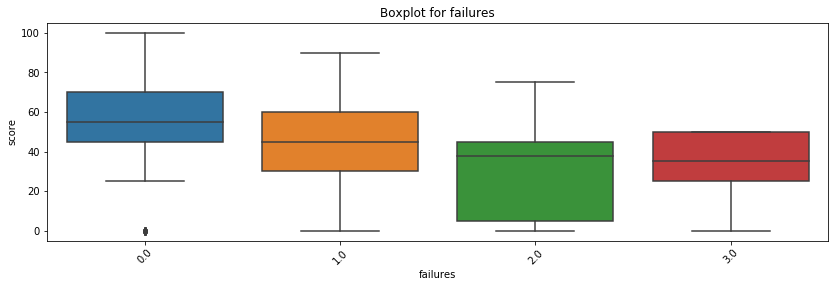

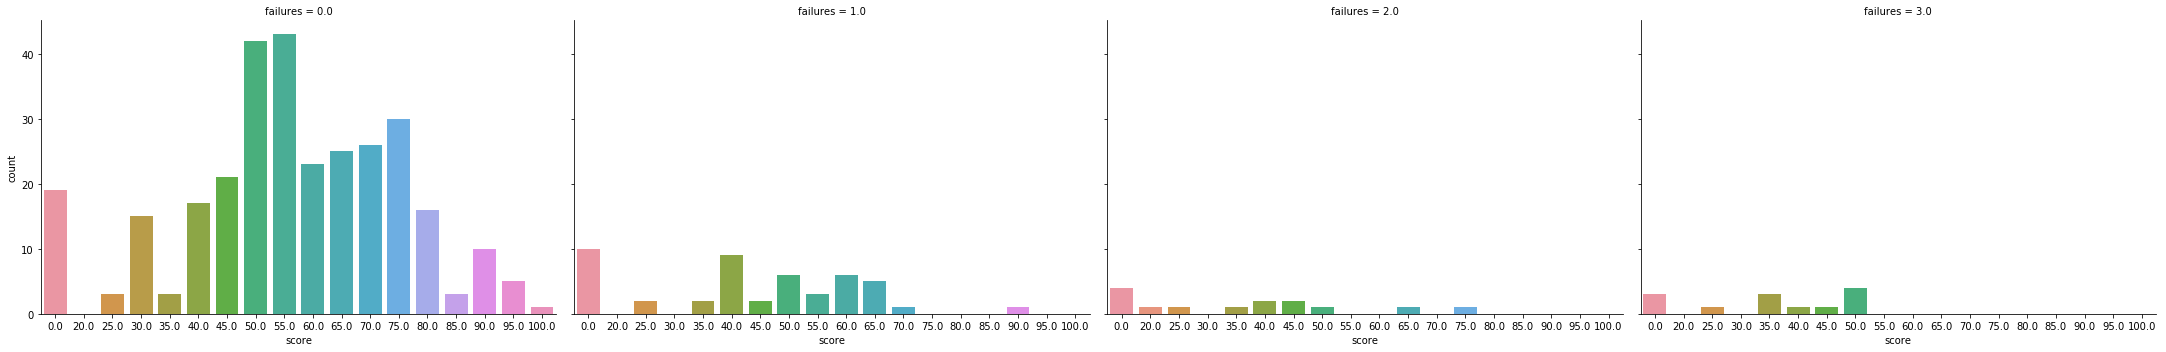

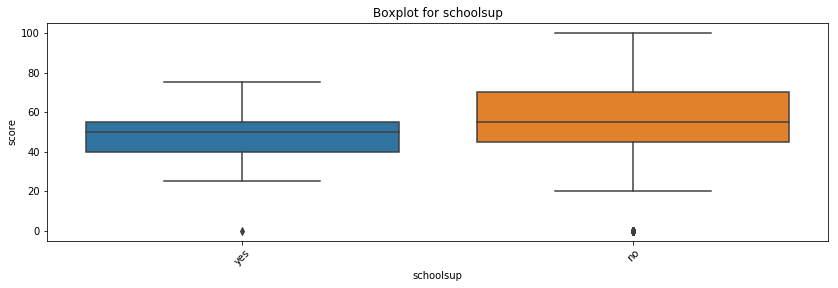

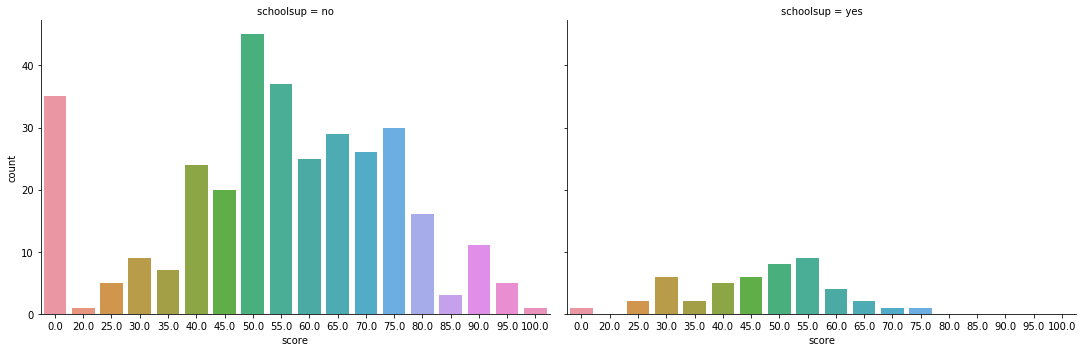

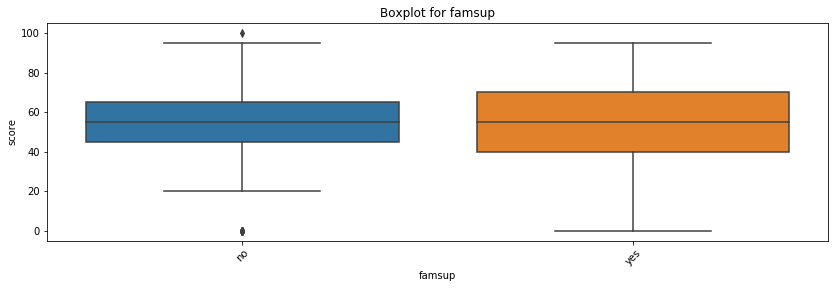

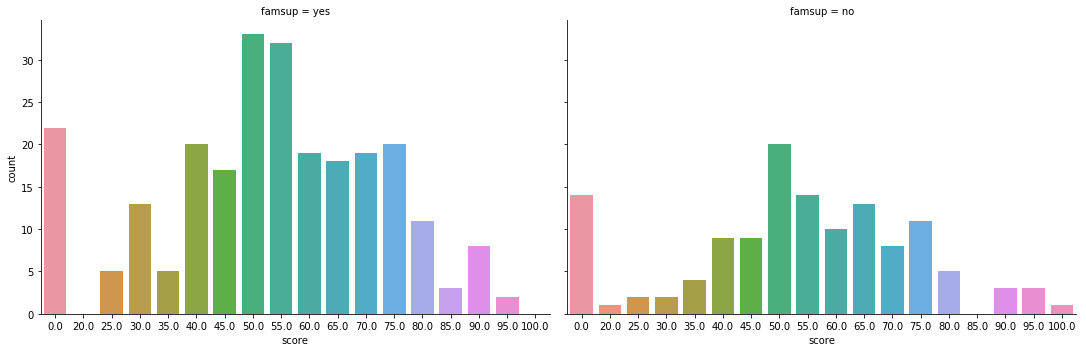

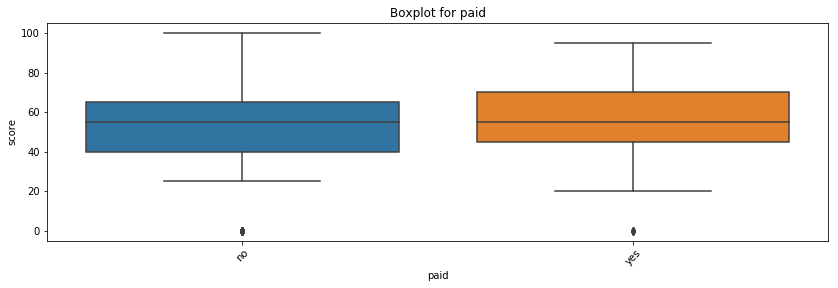

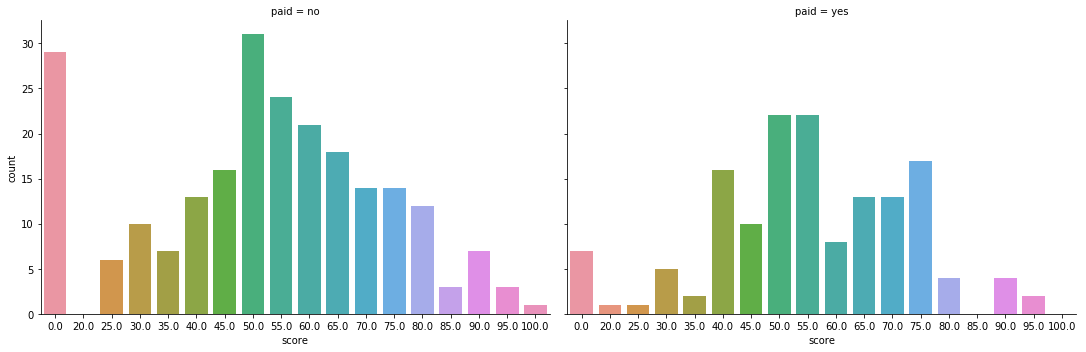

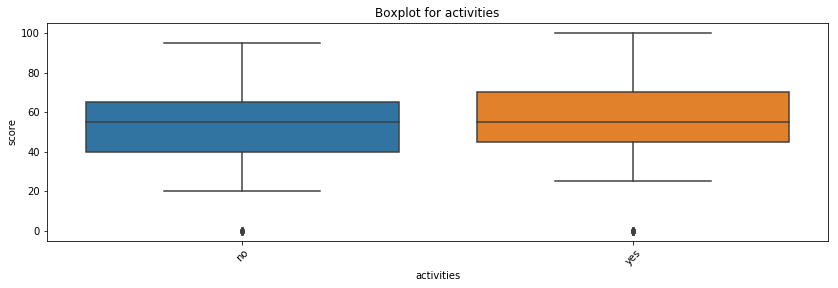

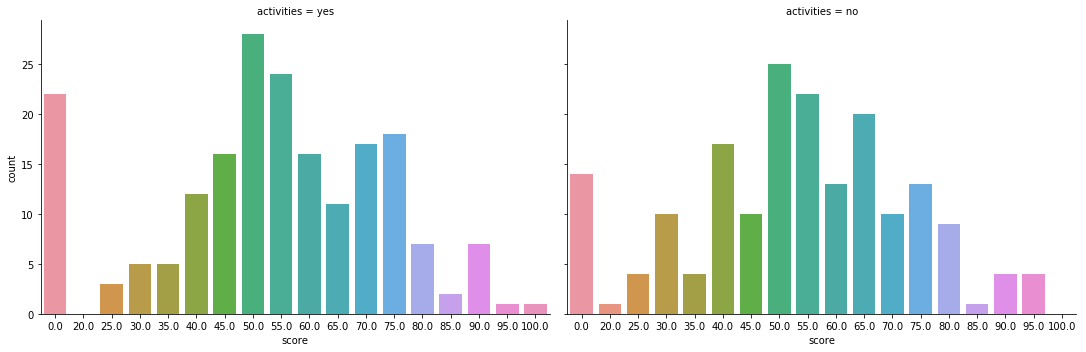

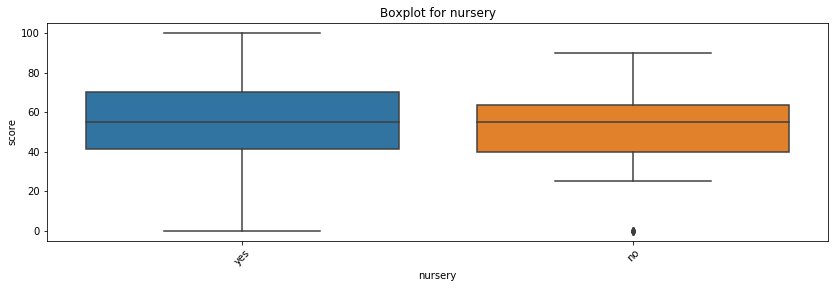

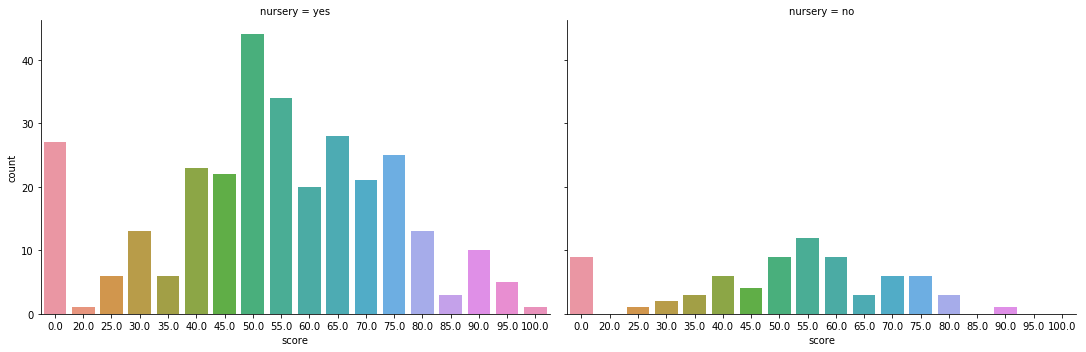

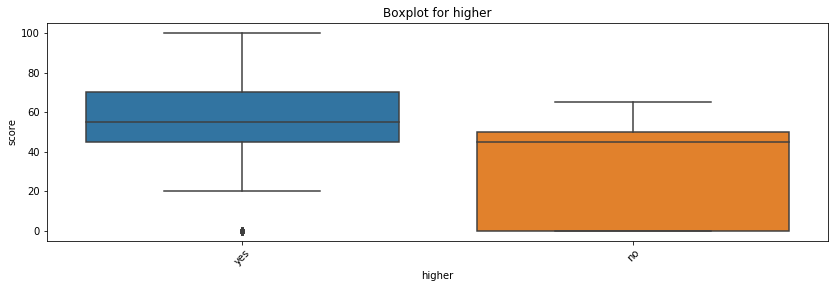

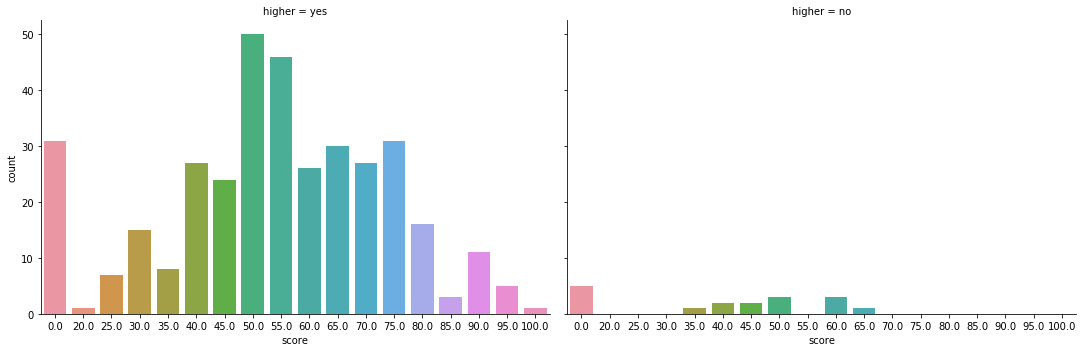

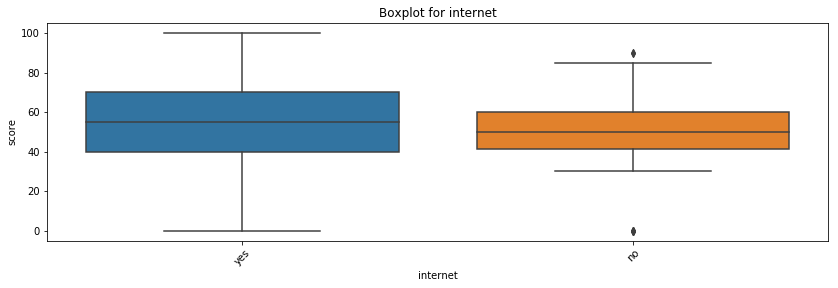

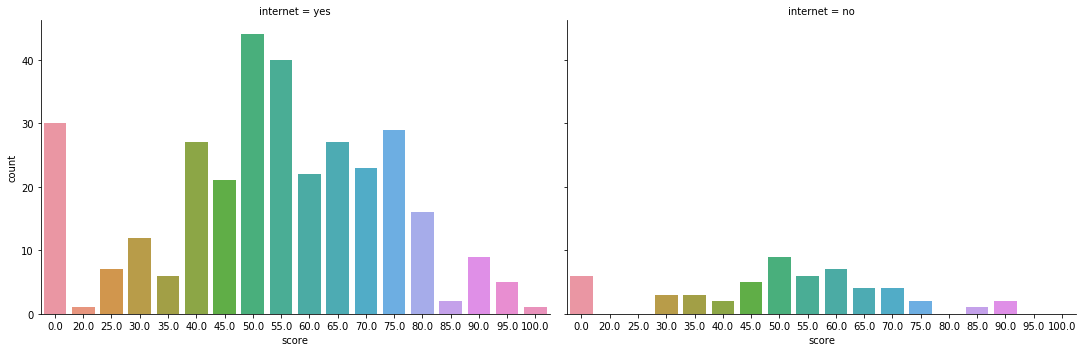

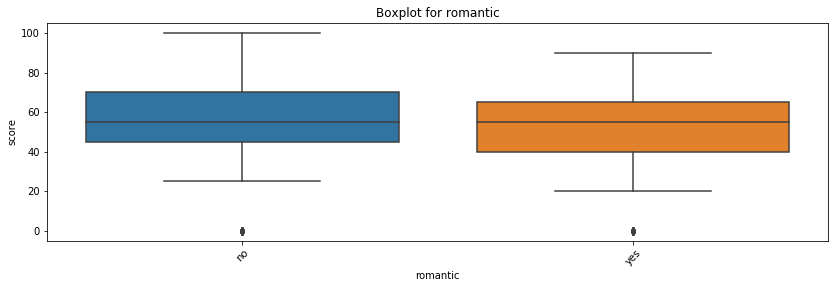

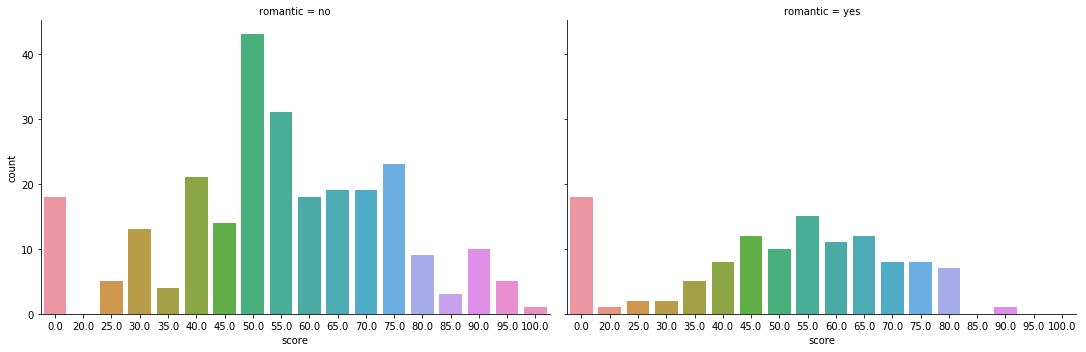

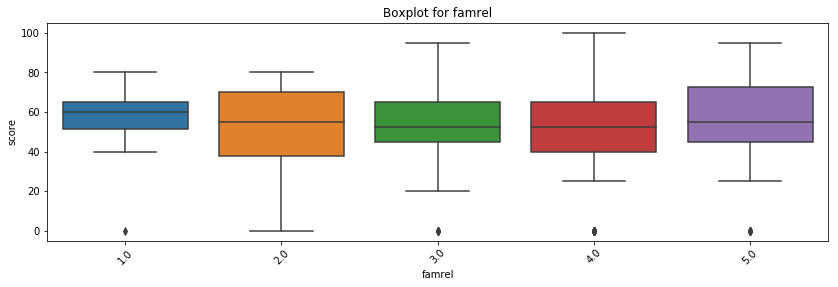

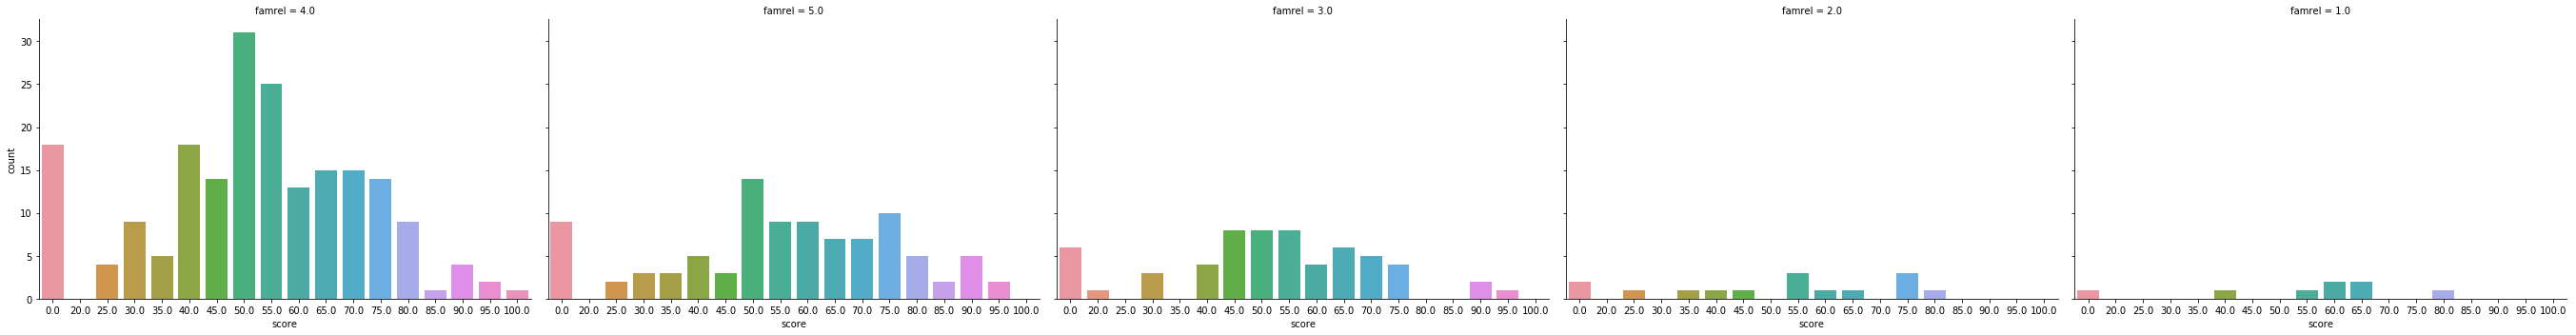

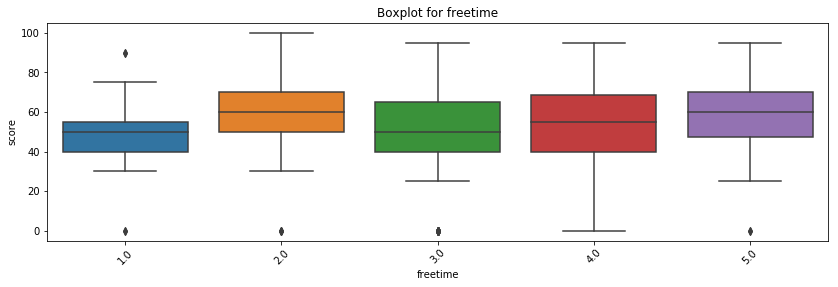

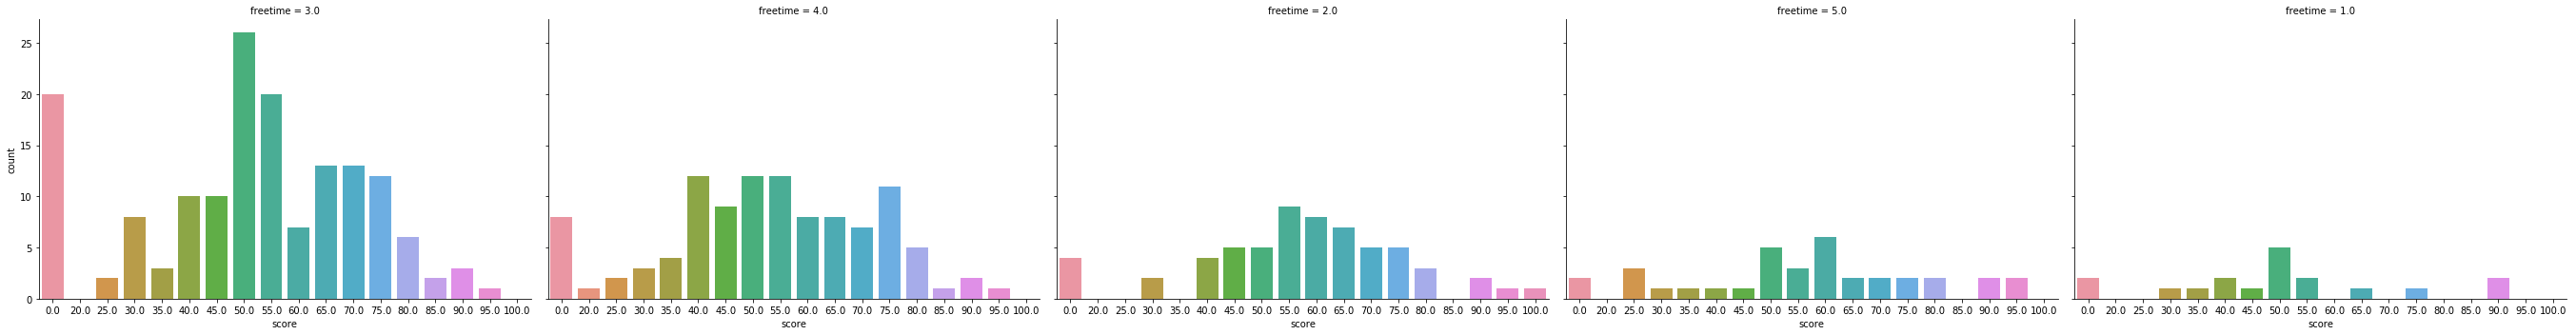

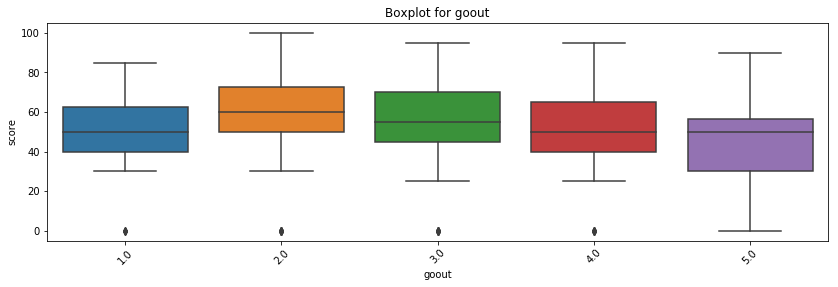

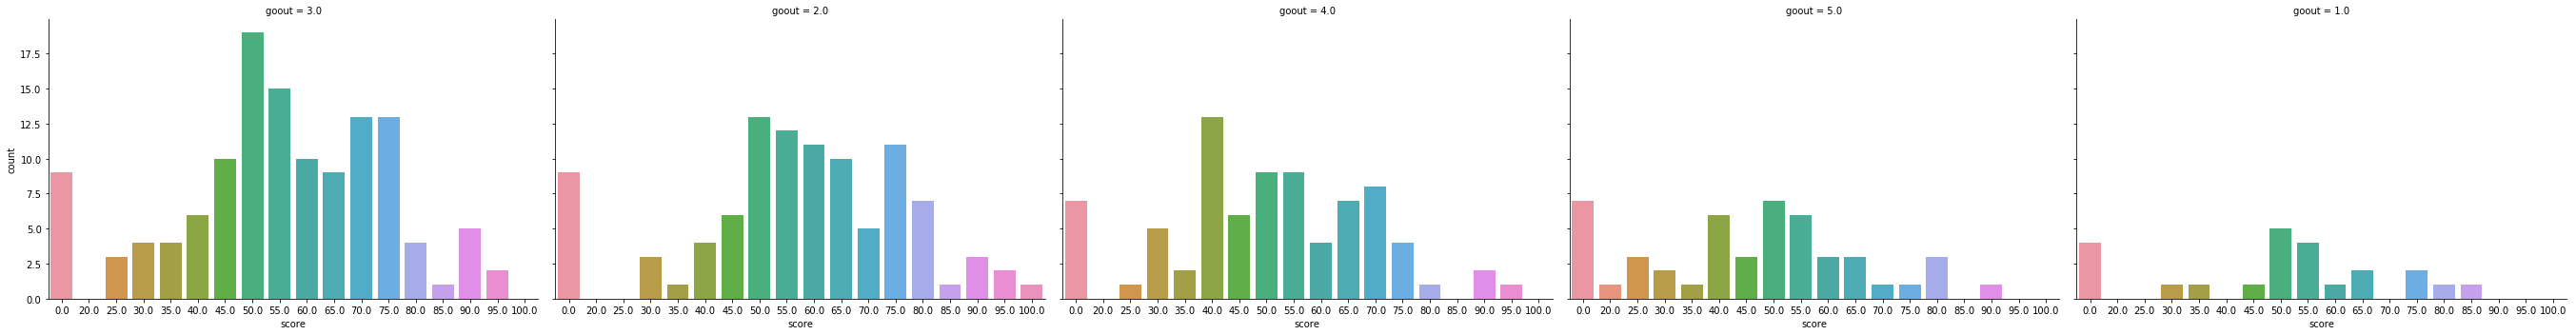

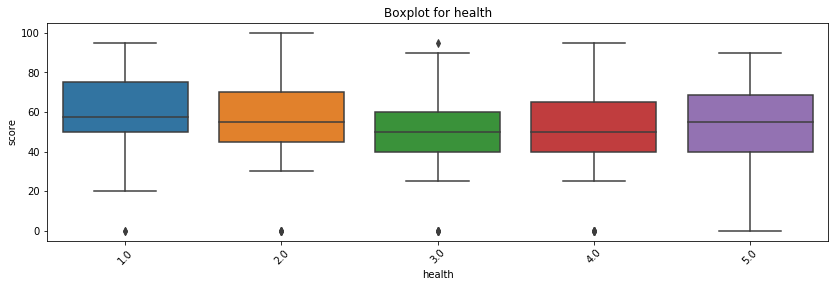

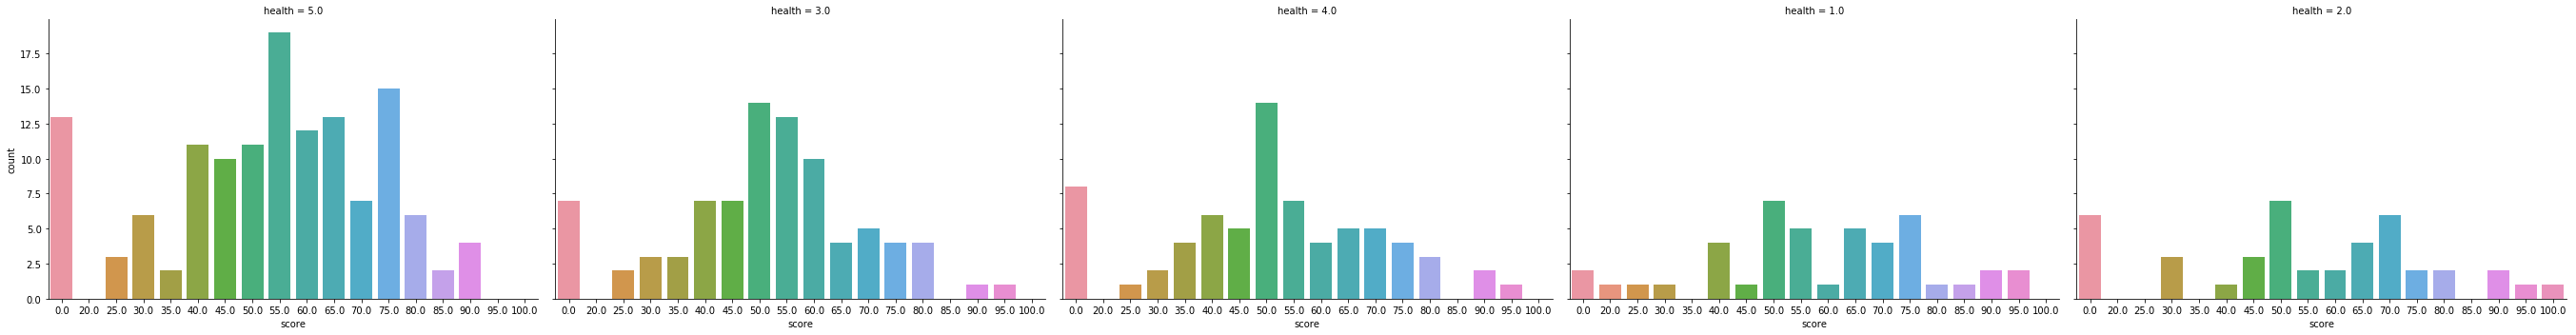

In [179]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', \
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid','activities', \
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)
    order = stud[col].value_counts().index
    sns.catplot(x='score', col = col, col_order = order, kind ='count', data=stud, aspect = 1.5);

По графикам:
    1) school - медианое значение по школам одинаково. Для MS кол-во мин оценrb выше чем у GP. Данных по GP школе больше. На глаз данные по школам не сильно отличаются.
    2) sex - кол-во девочек и мальчиков в выборке почти одинаково по графику видно что у мальчиков более выше оценки. На первый взгляд явных отличий нет. У девочек больше средних оценок.
    3) address - у городских учеников лучше оценки. Данный признак влияет на оценку, так что будем его использовать в модели.
    4) famsize - различий между  LE3 и GT3 нет. Нужно данный признак убрать из выборки
    5) Pstatus - не сильно влияет на балы. Значений "А" меньше в выборке. Нужно убрать из данных
    6) Medu - образование мамы влияет на балы ученика. В целом чем выше уровень образования у матери тем выше оценки у ребенка. В данных есть показатель высоких оценок при образовании = 0, Но всего учеников не много Medu = 0. Поэтому нельзя сказать если у мамы нет образования то ученик будет получать наивысшие была по математике. Буду использовать в модели
    7) Fedu - не такое значительное влиенте на оценку как при Medu. Но при значении 0 тоже показывает высокие баллы. Там где у Fedu = 0 Medu > 0 и наооброт у Medu =0,Fedu>0 может эта взаимосвзяь и влияет на высокие оценки у ребенка. Буду использовать в модели
    8) Mjob - более высокие оценки получают ученики если у них мама работает в сфере здравоохранения. Стабильные больше средних оценок при значении at_home', 'other'. Надо посмотреть на тест стьюдента. Какое влияние оказывает на оценки.
    9) Fjob - не сильное влияние на оценку boxplot почти одинаковы кроме 'teacher' - оценок выше среднего больше. Но кол-во учеников по teacher мало как и по 'health', 'at_home'. Данный признак не будем включать в модель.
    10) reason - средние значения по причинам одинаковые 75 и 25 квантиль почти на одном уровне. Данный признак не влияет на оценку. Не будем учитывать.
    11) guardian - на оценку не влияет boxplot одинаковые. Не буду учитывать в модели
    12) traveltime - по всем значениям распределение одинаковое. Не буду учитывать в модели
    13) studytime - есть небольшие различия. Чем больше времени на учебу выделяет ученик тем больше его средние значения. Посмотим на тест стьюдента.
    14) failures - сильно влияет на целевую переменую, чем больше внеучебных неудач тем хуже оценка. Однозначно оставляем.
    15) schoolsup - если подумать то если есть доп. подержка то оценки должны быть лучше, но по графику совсем наоборот. Может это из-за того что мало учеников в выборке, которые имеют подержку школы. Посмотрим на тест стьюдента.
    16) famsup - значения по сем. подержке не различаются мед. значения и 75 и 25 квантиль почти на одном уровне. Не буду брать признак в модель
    17) paid - по логике данный признак должен влиять на оценку если ученик доп. занимается математикой, то и оценка у него должна быть выше. По графику 25 и 75 граница не много выше у 'yes'. Посмотрю на тест стьюдента.
    18) activities - разница не большая, если школьник занимается доп. занятиями то у него показатели чуть лучше.
    19) nursery - не влияет на оценку. Средние и 25 квартиль на одном уровне. Да и значений с No меньше удаляю из DF
    20) higher - сильно влияет на оценку. Если ученик хочет получить высшее образование, то и оценка у него выше. Включаю в модель
    21) internet - не оказывает сильное влияение на оценку, тех у кого интернета нет меньше в выборке
    22) romantic - есть небольшие раличия наличие романтических отношений ухудшают оценки. Возьму в модель
    23) famrel - не большие изменения по 25 квантилю по отношениям 1 и 2. Но по данным значениям данных не много. Надо посмотреть на тест.
    24) freetime - небольшие различия. Меньше времени хуже оценки. Проверим на тесте стьюдента
    25) goout - чем больше проводят с друзьями тем хуже оценки. Если вообще нет времени =1, то оценки тоже не высокие. но и данных для 1 меньше.
    26) health - не влияющий на оценку. Исключаю из выборки


По графикам анализ сделан, надо потвердить догадки. Проверим, есть ли статистическая разница в распределении оценок 
по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по 
различным параметрам неразличимы:

In [180]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
            
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', \
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid','activities', \
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)


Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


В результате анализа оставляем важные признаки: age, absences, sex, address, Medu, Fedu, Mjob, studytime, failures, paid, higher, romantic.



In [181]:
stud_for_model = stud.loc[:, ['age', 'absences', 'sex', 'address', 'Medu','Fedu','Mjob','studytime','failures','paid',\
                             'higher','romantic','score']]
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 13 columns):
age          376 non-null int64
absences     376 non-null float64
sex          376 non-null object
address      376 non-null object
Medu         376 non-null float64
Fedu         376 non-null float64
Mjob         376 non-null object
studytime    376 non-null float64
failures     376 non-null float64
paid         376 non-null object
higher       376 non-null object
romantic     376 non-null object
score        376 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 51.1+ KB


преобразуем некоторые категориальные признаки в dummy переменные, т.к. связи в признаках нет,
нет порядкового счета. Это признаки: sex,address, Mjob. 


In [182]:
stud_for_model = pd.get_dummies(stud_for_model, columns=[ 'sex','address','Mjob']) 

In [183]:
stud_for_model.head()

,age,absences,Medu,Fedu,studytime,failures,paid,higher,romantic,score,sex_F,sex_M,address_R,address_U,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,18,6.0,4.0,4.0,2.0,0.0,no,yes,no,30.0,1,0,0,1,1,0,0,0,0
1,17,4.0,1.0,1.0,2.0,0.0,no,yes,no,30.0,1,0,0,1,1,0,0,0,0
2,15,10.0,1.0,1.0,2.0,3.0,no,yes,no,50.0,1,0,0,1,1,0,0,0,0
3,15,2.0,4.0,2.0,3.0,0.0,yes,yes,yes,75.0,1,0,0,1,0,1,0,0,0
4,16,4.0,3.0,3.0,2.0,0.0,yes,yes,no,50.0,1,0,0,1,0,0,1,0,0


Буду применять модель линейной регрессии, т.к. .


## Выводы
В результате EDA выяснилось, выборка не большая всего 395 записей. Почти в каждом признаке есть пропуски, но их не много поэтому были замененены на медианое или самое часто встречающееся значение. В признаках absences есть выбросы, строки були удалены.  В целевой переменой score то же были пропуски удалила, не заменяла на среднее, т.к. думаю может повлиять на обучение модели, исказить предсказанные значения.
Самые важные параметры рекомендуются использовать 'age', 'absences', 'sex', address','Medu','Fedu','Mjob','studytime',
'failures','paid','higher','romantic','score'
В результате анализа можно предположить чем выше образование у матери и отца тем выше оценка. Чем меньше  количество внеучебных неудач тем лучше оценка, если ученик хочет получить высшее образование, то и старается лучше и оценки у него выше. Наличие романтических отношений отрицательно сказываются на баллах. У девочек лучше средний балл, у мальчиков больше прорывов в получение высоких балов. 
Для данного data set быду применять модель линейной регрессии, т.к. есть целевая переменная которая принимает множество значений и есть неколлениарные признаки. 